In [1]:
# the markers in matlab are interactive, can I do this here too?
# when I use time maybe make it from 1-x (e.g. where I use np.arange)

In [280]:
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
from matplotlib.pyplot import figure
import ipywidgets as widgets
from math import pi
import scipy.signal

*David Heeger*, *Eero Simoncelli*, and *Patrick Teo* 6/96.  <br>
Based on OBVIUS tutorial by *David Heeger* and *Eero Simoncelli*.<br>
Translated into Python by *Chrysa Papadaniil* 9/21. <br>

### 1. Discrete-time sequences

Discrete-time sequences are represented as a sequence of numbers f[n], for integer values of n. There are several important, basic sequences.  Examples of these basic sequences will be plotted below.  We now plot several of the important sequences, from n=0 to n=31.

In [3]:
n_range = np.arange(0,32)

##### Impulse sequence, delta[n], is 1 only when n=0. 
Here we plot delta[n-16]:

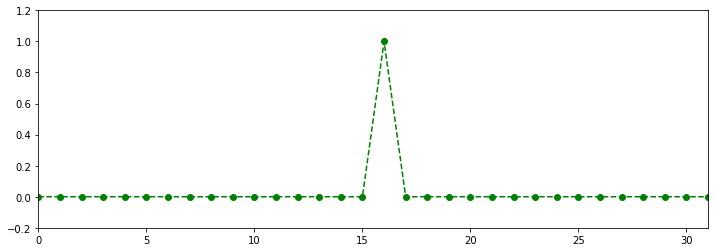

In [4]:
impulse = np.zeros((1, len(n_range)))
impulse[:,16]=1

#Plot it
plt.figure(figsize=(12,4))
plt.plot(n_range, np.squeeze(impulse), 'go-', linestyle='dashed')
plt.xlim(0,len(n_range)-1)
plt.ylim(-0.2,1.2)
warnings.filterwarnings("ignore")

##### Step sequence, u[n], is 0 when n<0.  
Here we plot u[n-16]:

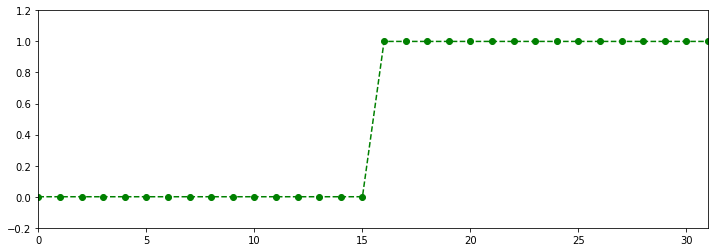

In [5]:
step = np.zeros((1, len(n_range)))
step[:,16:32]= np.ones(16)

#Plot it
plt.figure(figsize=(12,4))
plt.plot(n_range, np.squeeze(step), 'go-', linestyle='dashed')
plt.xlim(0,len(n_range)-1)
plt.ylim(-0.2,1.2)
warnings.filterwarnings("ignore")

Next, we plot a sinusoidal sequence with period 8:

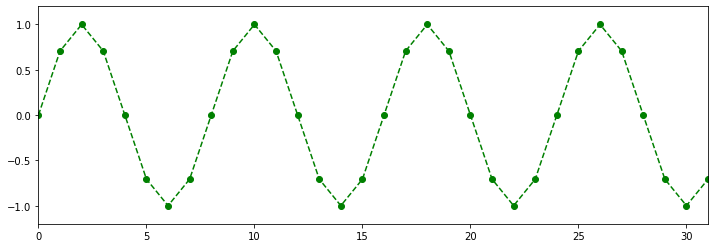

In [6]:
amplitude = 1 
phase_off = 0 
period = 8
freq = 2*pi/period

sinusoid = np.empty((1,len(n_range)))
sinusoid[:] = amplitude * np.sin(freq * n_range + phase_off)

#Plot it
plt.figure(figsize=(12,4))
plt.plot(n_range, np.squeeze(sinusoid), 'go-', linestyle='dashed')
plt.xlim(0,len(n_range)-1)
plt.ylim(-1.2,1.2)
warnings.filterwarnings("ignore")

Notice that for discrete sinusoids, unlike continous sinusoids, adding 2*$\pi$ to the frequency gives the same sinusoid:

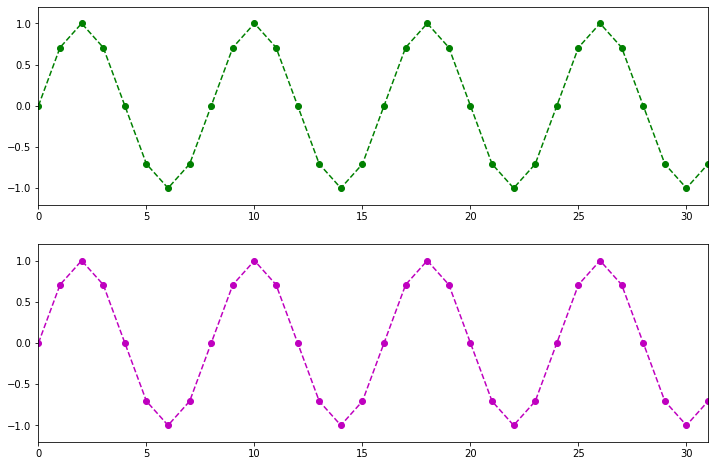

In [7]:
freq_2 = 2*pi/period + 2*pi
sinusoid_2 = np.empty((1,len(n_range)))
sinusoid_2[:] = amplitude * np.sin(freq_2 * n_range + phase_off)


#Plot it
fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1, figsize=[12,8])

ax1.plot(n_range, np.squeeze(sinusoid), 'go-', linestyle='dashed')
ax1.set_xlim(0,len(n_range)-1)
ax1.set_ylim(-1.2,1.2)

ax2.plot(n_range, np.squeeze(sinusoid_2), 'mo-', linestyle='dashed')
ax2.set_xlim(0,len(n_range)-1)
ax2.set_ylim(-1.2,1.2)
plt.show()

The importance of this is that we need only consider frequencies in a frequency interval of length 2*$\pi$ such as -$\pi$ to $\pi$. Also notice that although continuous sinusoids with frequency w are periodic with period $2*\pi/w$, this is not necessarily true of discrete sinusoids.  For example, a discrete sinusoid with frequency $w=1$ is NOT periodic:

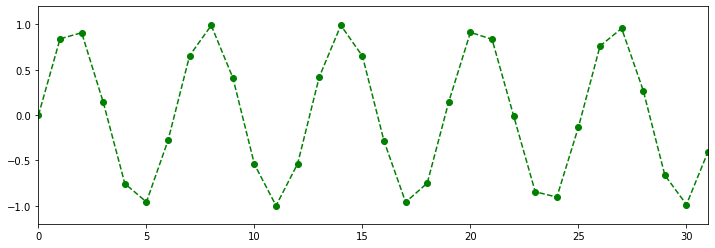

In [8]:
period = 2*pi
freq = 2*pi/period

non_periodic_sinusoid = np.empty((1,len(n_range)))
non_periodic_sinusoid[:] = amplitude * np.sin(freq * n_range + phase_off)

#Plot it
plt.figure(figsize=(12,4))
plt.plot(n_range, np.squeeze(non_periodic_sinusoid), 'go-', linestyle='dashed')
plt.xlim(0,len(n_range)-1)
plt.ylim(-1.2,1.2)
warnings.filterwarnings("ignore")

Why isn't this sequence periodic?  Is it because we've plotted only 32 samples?  If we were to plot more samples, would it ever repeat? <br>

For a finite length sequence, we have an even more stringent requirement.  By a periodic finite length sequence, we mean circularly periodic.  When you go off the end you start back at the beginning.  To be periodic, the sequence length must be a multiple of the period.

Altogether, there are only N distinguishable frequencies that are circularly periodic with period (sequence length) N.  These frequencies are: 

$$
       2 \pi k/N \text{ for } k=0,1,...,N-1.  
$$

In our examples, N=32, so the frequencies are: 

$$
       0, \text{ }\pi/16,\text{ } 2\pi/16, \text{ }3\pi/16,...,\text{ } 31\pi/16.
$$

This set of discrete (co-)sinusoids can also be indexed in another way: 

$$
2*\pi k/N \text{  for  } k=-N/2,...,-1,0,1,...,N/2. 
$$ 

In our examples, these periods are:

$$
       -16\pi/16,\text{ }...,\text{ }-\pi/16,\text{ }0,\text{ }\pi/16,\text{ }...,\text{ }15\pi/16. 
$$

Take a look at some of these sinusoids and cosinusoids to see that these frequencies are all distinct. <br>

Are the sinusoids and cosinusoids with frequencies 0 and pi distinct?  How about with frequencies $\pi$ and $\pi$?


### 2. Linear systems

A discrete time system is defined as a transformation or operator
that maps an input sequence to an output sequence:

$$
f[x] \rightarrow g[x]  \text{ or } g[x] = T\{f[x]\}
$$

Linear systems are defined by the principle of superposition. Superposition has two parts: additivity and homogeneity.

`Additivity`:

$$
T\{f1[x] + f2[x]\} = T\{f1[x]\} + T\{f2[x]\}
$$

`Homogeneity (scaling)`:
$$
T\{a f[x]\} = a T\{f[x]\}
$$

A linear system can be expressed as a matrix multiplication:

$$
                  g[x] = M f[x]
$$ 

where M is an m-by-n matrix, g[x] is a sequence of length m and f[x] is a sequence of length n. <br>

A time-invariant system is one for which a shift or delay of the input sequence causes a corresponding shift in the output sequence.  An example of a linear time-VARIANT system is subsampling.  We'll get to that later.<br>

For a linear time-invariant system, the rows of the M matrix are all shifted copies of one another.  Such a matrix is called a Toeplitz matrix.  The output of a linear time-invariant system can also be computed using convolution.  Convolution is equivalent to matrix-multiplication when using a Toeplitz matrix.<br>

First, let's create a Toeplitz matrix and display it as an image.

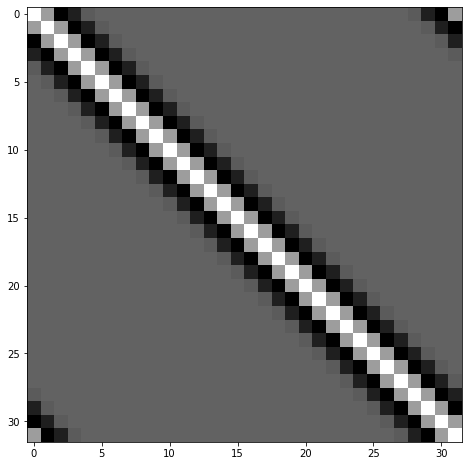

In [9]:
t_matrix = np.zeros((32,32))
one_row = [-.004, -.031, -.047, .031, .102, .031, -.047, -.031, -.004]

for row in range (0,32):
    k = 0
    for col in range (row-3, row+6):
        t_matrix[row, np.remainder((col-1+32),32)] = one_row[k]
        k = k + 1

#Plot it
plt.figure(figsize=(8,8))
plt.imshow(t_matrix, cmap='Greys_r')
plt.show()

Now, let's take our impulse signal and multiply it through the matrix:

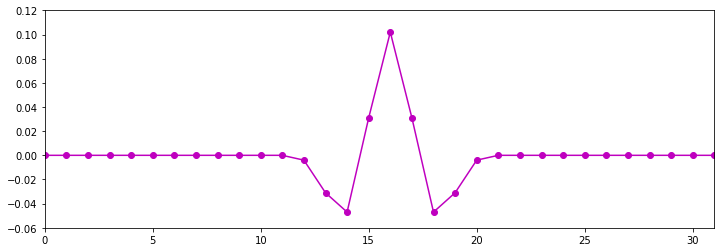

In [10]:
impulse_response = t_matrix.dot(np.transpose(impulse))

#Plot it
plt.figure(figsize=(12,4))
plt.plot(n_range, impulse_response, 'mo-')
plt.xlim(0,len(n_range)-1)
plt.ylim(-.06, .12)
warnings.filterwarnings("ignore")

Matrix multiplication is an inefficient way of doing the above computation because most of the entries in the matrix are zeros.  Python provides tools for efficient linear filtering.  A linear filter has only the interesting (non-zero) entries of the Toeplitz matrix.  Then the output is computed using convolution, shifting the filter over the input signal. The efficiency of convolution (over matrix multiplication) will be critical when we get to 2D linear transforms on images, and 3D (space-time) transforms on image sequences.  The matrices would be huge and very sparse (lots of zeros).  Let's do the above transform again, using convolution.

In [11]:
def cconv2(*args):
    ''' RES = CCONV2(MTX1, MTX2, CTR)
    
        Circular convolution of two matrices.  Result will be of size of
        LARGER vector.
     
        The origin of the smaller matrix is assumed to be its center.
        For even dimensions, the origin is determined by the CTR (optional) 
        argument:
             CTR   origin
              0     DIM/2      (default)
              1     (DIM/2)+1  
    
        Eero Simoncelli, 6/96.  Modified 2/97.  
        Python port by Rob Young, 8/15  '''
    
    if len(args) < 2:
        print ('Error: cconv2 requires two input matrices!')
        print ('Usage: cconv2(matrix1, matrix2, center)')
        print ('where center parameter is optional')
        return
    else:
        a = np.array(args[0])
        b = np.array(args[1])

    if len(args) == 3:
        ctr = args[2]
    else:
        ctr = 0

    if a.shape[0] >= b.shape[0] and a.shape[1] >= b.shape[1]:
        large = a
        small = b
    elif a.shape[0] <= b.shape[0] and a.shape[1] <= b.shape[1]:
        large = b
        small = a
    else:
        print ('Error: one matrix must be larger than the other in both dimensions!')
        return
    
    ly = large.shape[0]
    lx = large.shape[1]
    sy = small.shape[0]
    sx = small.shape[1]

    ## These values are the index of the small mtx that falls on the
    ## border pixel of the large matrix when computing the first
    ## convolution response sample:
    sy2 = np.floor((sy+ctr+1)/2.0).astype(int)
    sx2 = np.floor((sx+ctr+1)/2.0).astype(int)

    # pad
    nw = large[ly-sy+sy2:ly, lx-sx+sx2:lx]
    n = large[ly-sy+sy2:ly, :]
    ne = large[ly-sy+sy2:ly, :sx2-1]
    w = large[:, lx-sx+sx2:lx]
    c = large
    e = large[:, :sx2-1]
    sw = large[:sy2-1, lx-sx+sx2:lx]
    s = large[:sy2-1, :]
    se = large[:sy2-1, :sx2-1]

    n = np.column_stack((nw, n, ne))
    c = np.column_stack((w,large,e))
    s = np.column_stack((sw, s, se))

    clarge = np.concatenate((n, c), axis=0)
    clarge = np.concatenate((clarge, s), axis=0)

    c = scipy.signal.convolve(clarge, small, 'valid')

    return c

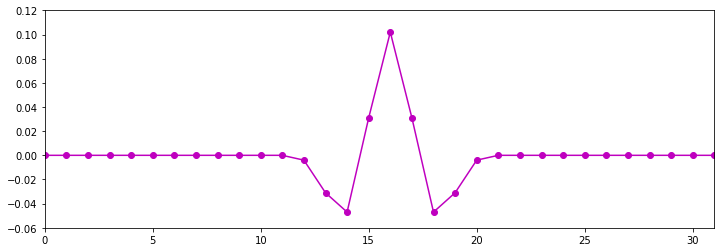

In [12]:
filter_params = np.full((1,9),[-.004, -.031, -.047, .031, .102, .031, -.047, -.031, -.004])

new_impulse_response = cconv2(impulse, filter_params)

#Plot it
plt.figure(figsize=(12,4))
plt.plot(n_range, np.squeeze(new_impulse_response), 'mo-')
plt.xlim(0,len(n_range)-1)
plt.ylim(-.06, .12)
warnings.filterwarnings("ignore")

A linear time-invariant system is completely characterized by its impulse response, that is, its response to an impulse input.  The response to an impulse is the corresponding column in the Toeplitz matrix.  Given the impulse response, we can compute the response to any input.  Any input can be expressed as the sum of a bunch of scaled impulses.  Since the system is linear, the output is the sum of a bunch of scaled copies of the impulse response.  

Example for the sum of two impulses:

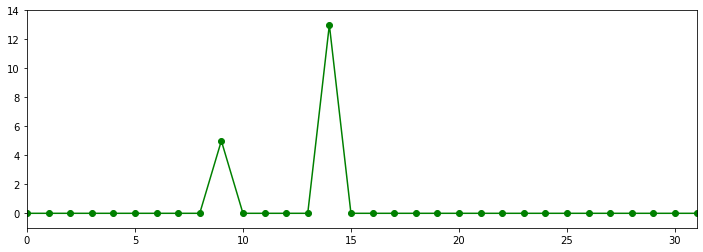

In [13]:
# Sum of two impulses:
impulse_10 = np.zeros((1,32)) 
impulse_10[:,9] = 1

impulse_15 = np.zeros((1,32)) 
impulse_15[:,14] = 1

signal = 5*impulse_10 + 13*impulse_15

#Plot it
plt.figure(figsize=(12,4))
plt.plot(n_range, np.squeeze(signal), 'go-')
plt.xlim(0,len(n_range)-1)
plt.ylim(-1, 14)
warnings.filterwarnings("ignore")

Filter responses to individual impulses:

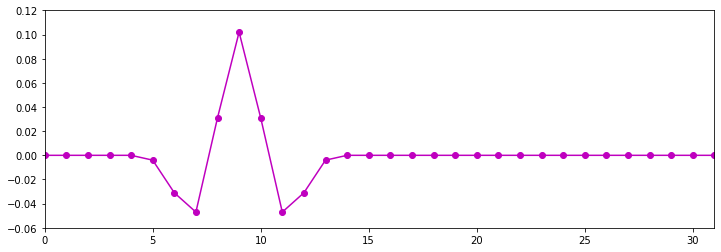

In [14]:
impulse_response_10 = cconv2(impulse_10,filter_params)

#Plot it
plt.figure(figsize=(12,4))
plt.plot(n_range, np.squeeze(impulse_response_10), 'mo-')
plt.xlim(0,len(n_range)-1)
plt.ylim(-.06, .12)
warnings.filterwarnings("ignore")

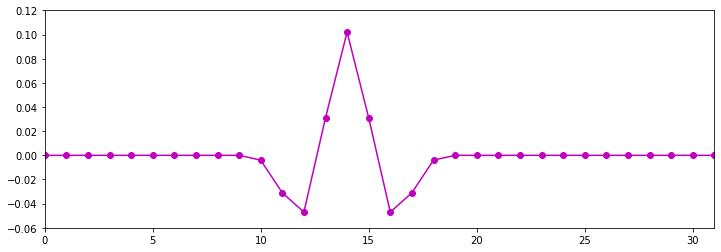

In [15]:
impulse_response_15 = cconv2(impulse_15,filter_params)

#Plot it
plt.figure(figsize=(12,4))
plt.plot(n_range, np.squeeze(impulse_response_15), 'mo-')
plt.xlim(0,len(n_range)-1)
plt.ylim(-.06, .12)
warnings.filterwarnings("ignore")

Filter response to sum of impulses:

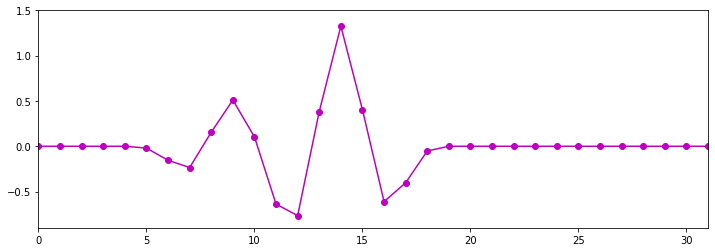

In [16]:
signal_response = cconv2(signal,filter_params)

#Plot it
plt.figure(figsize=(12,4))
plt.plot(n_range, np.squeeze(signal_response), 'mo-')
plt.xlim(0,len(n_range)-1)
plt.ylim(-.9, 1.5)
warnings.filterwarnings("ignore")

Sum of filter responses to individual impulses: 

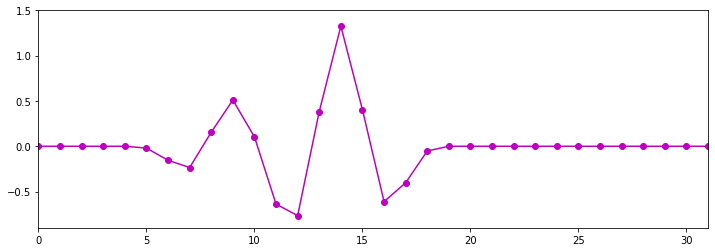

In [17]:
sum_of_impulse_responses = 5*impulse_response_10 + 13*impulse_response_15

#Plot it
plt.figure(figsize=(12,4))
plt.plot(n_range, np.squeeze(sum_of_impulse_responses), 'mo-')
plt.xlim(0,len(n_range)-1)
plt.ylim(-.9, 1.5)
warnings.filterwarnings("ignore")

The difference (or mean-squared error) between them should return 0:

In [18]:
np.mean((signal_response-sum_of_impulse_responses)**2)

0.0

As another example, consider the filter response to the step function

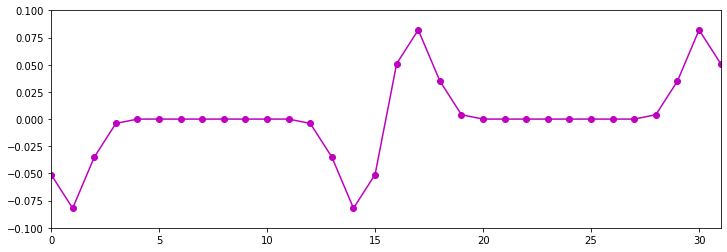

In [19]:
step_response = cconv2(step,filter_params)

#Plot it
plt.figure(figsize=(12,4))
plt.plot(n_range, np.squeeze(step_response), 'mo-')
plt.xlim(0,len(n_range)-1)
plt.ylim(-.1, .1)
warnings.filterwarnings("ignore")

Represent filter to response to step as sum of filter responses to impulses:

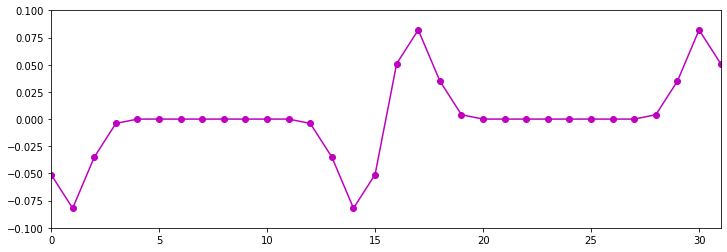

In [20]:
sum_of_impulse_responses = np.zeros((1,32))

for n in range (16,32):
    impulse_n = np.zeros((1,32)) 
    impulse_n[:,n] = 1
    sum_of_impulse_responses = sum_of_impulse_responses + cconv2(impulse_n,filter_params)

#Plot it
plt.figure(figsize=(12,4))
plt.plot(n_range, np.squeeze(sum_of_impulse_responses), 'mo-')
plt.xlim(0,len(n_range)-1)
plt.ylim(-.1, .1)
warnings.filterwarnings("ignore")

This should return 0:

In [21]:
np.mean((step_response-sum_of_impulse_responses)**2)

0.0

Note that cconv2 performs circular convolution.  Circular convolution wraps around from the end the sequence back to the beginning again, as if the sequence was a full period of a longer periodic sequence.  The consequence of circular convolution is evident in the step-response.  Obviously, there are many alternative ways to handle the endpoints of a sequence.  For example, one way is to repeat the end sample values (at both ends) rather than wrapping.

### 3. Properties of linear time-invariant systems

#### Convolution is commutative
(i.e. the order of two consecutive convolution operations is irrelavant):

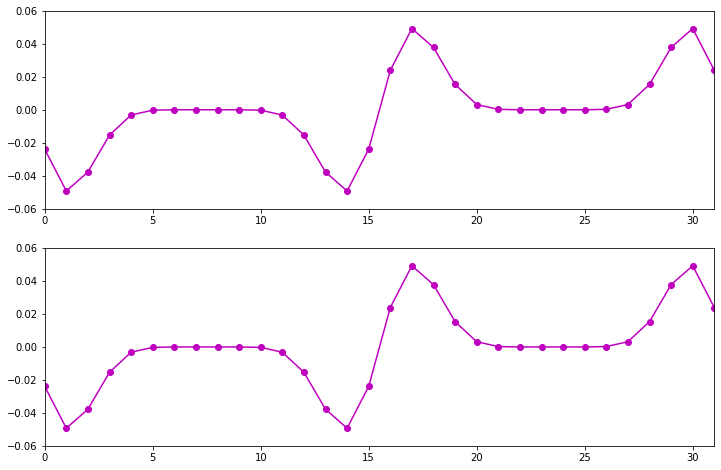

In [22]:
filter_1 = np.full((1,9), [-.004, -.031, -.047, .031, .102, .031, -.047, -.031, -.004])

filter_2 = np.full((1,5), [1, 4, 6, 4, 1])
filter_2 = filter_2/16

response_1_2 = cconv2(cconv2(step,filter_1),filter_2)
response_2_1 = cconv2(cconv2(step,filter_2),filter_1)

#Plot it
fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1, figsize=[12,8])

ax1.plot(n_range, np.squeeze(response_1_2), 'mo-')
ax1.set_xlim(0,len(n_range)-1)
ax1.set_ylim(-0.06,0.06)

ax2.plot(n_range, np.squeeze(response_2_1), 'mo-')
ax2.set_xlim(0,len(n_range)-1)
ax2.set_ylim(-0.06,0.06)
plt.show()


This should be close to zero:

In [23]:
np.mean((response_1_2-response_2_1)**2)

2.896565017219969e-35

Even though convolution (linear shift-invariant linear systems) commute, not all linear systems commute.  For example, matrix multiplication is not, in general, commutative.

Convolution also follows the distributive property (i.e., the sum of convolutions with two filters equals the convolution with the sum of the filters).

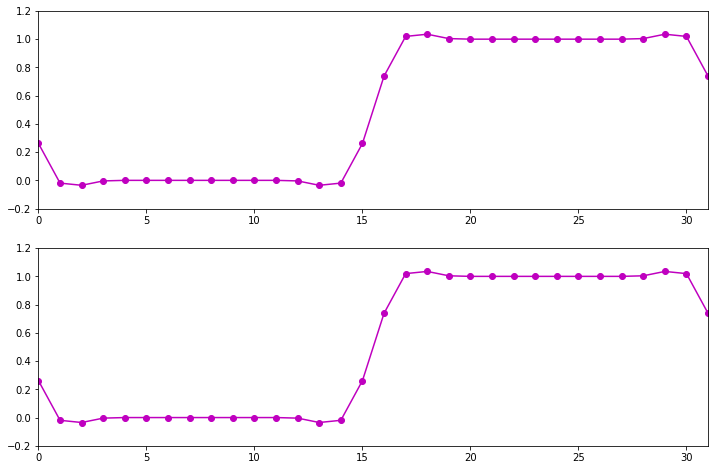

In [24]:
filter_1 = np.full((1,9), [-.004, -.031, -.047, .031, .102, .031, -.047, -.031, -.004])

filter_2 = np.full((1,9), [0, 0, 1, 4, 6, 4, 1, 0, 0])
filter_2 = filter_2/16

response_1 = cconv2(step,filter_1)
response_2 = cconv2(step,filter_2)

sum_of_responses = response_1 + response_2
sum_of_filters = filter_1 + filter_2
response_to_sum_of_filters = cconv2(step,sum_of_filters)

#Plot it
fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1, figsize=[12,8])

ax1.plot(n_range, np.squeeze(sum_of_responses), 'mo-')
ax1.set_xlim(0,len(n_range)-1)
ax1.set_ylim(-.2, 1.2)

ax2.plot(n_range, np.squeeze(response_to_sum_of_filters), 'mo-')
ax2.set_xlim(0,len(n_range)-1)
ax2.set_ylim(-.2, 1.2)
plt.show()

Should be zero:

In [25]:
np.mean((sum_of_responses-response_to_sum_of_filters)**2)

5.104090510818438e-33

### 4. Invertible linear systems

Here's a simple example of a linear filter that shifts the sequence by 2 samples.  This operation can, of course, be inverted by shifting in the other direction.

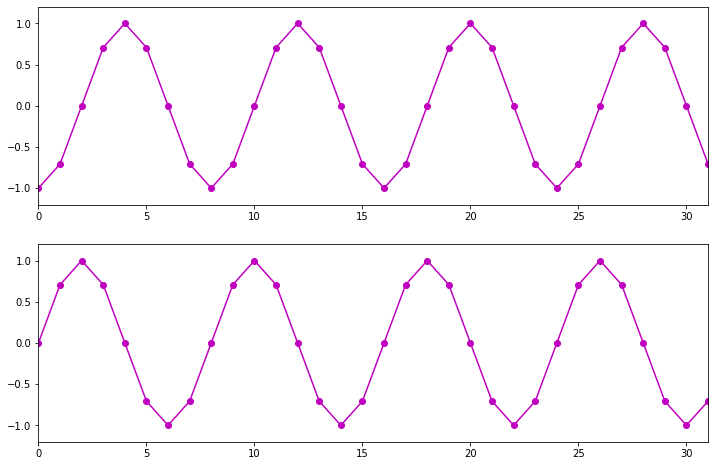

In [26]:
shift_filter = np.full((1,5), [0, 0, 0, 0, 1])
unshift_filter = np.full((1,5), [1, 0, 0, 0, 0])

shifted_sinusoid = cconv2(sinusoid,shift_filter)
unshifted_sinusoid = cconv2(shifted_sinusoid,unshift_filter)

#Plot it
fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1, figsize=[12,8])

ax1.plot(n_range, np.squeeze(shifted_sinusoid), 'mo-')
ax1.set_xlim(0,len(n_range)-1)
ax1.set_ylim(-1.2, 1.2)

ax2.plot(n_range, np.squeeze(unshifted_sinusoid), 'mo-')
ax2.set_xlim(0,len(n_range)-1)
ax2.set_ylim(-1.2, 1.2)
plt.show()


Another way to think of inverting a linear transform is in terms of inverting the corresponding transform matrix. The matrix for shifting operation looks like this:

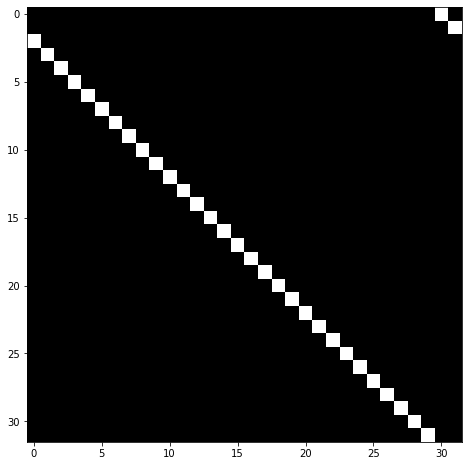

In [27]:
s_matrix = np.zeros((32,32))
one_row = [1, 0, 0, 0, 0]

for row in range (0,32):
    k = 0
    for col in range (row-1, row+4):
        s_matrix[row, np.remainder((col-1+32),32)] = one_row[k]
        k = k + 1

#Plot it
plt.figure(figsize=(8,8))
plt.imshow(s_matrix, cmap='Greys_r')
plt.show()

Now, lets' recompute the shifted sequence, using the matrix (instead of convolution):

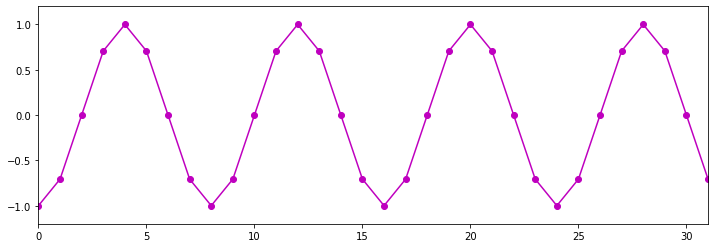

In [28]:
new_shifted_sequence = s_matrix.dot(np.transpose(sinusoid))

#Plot it
plt.figure(figsize=(12,4))
plt.plot(n_range, new_shifted_sequence, 'mo-')
plt.xlim(0,len(n_range)-1)
plt.ylim(-1.2, 1.2)
warnings.filterwarnings("ignore")

To invert the transform, we just invert the matrix:

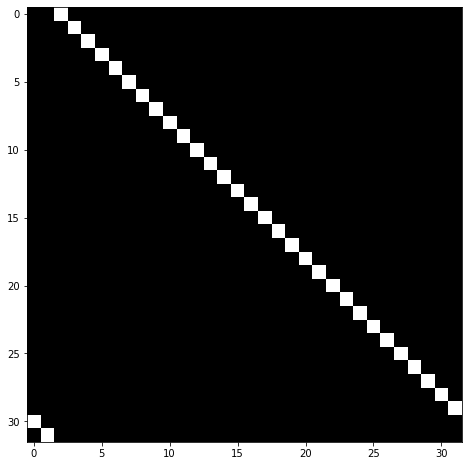

In [29]:
s_matrix_inv = np.linalg.inv(s_matrix)

#Plot it
plt.figure(figsize=(8,8))
plt.imshow(s_matrix_inv, cmap='Greys_r')
plt.show()

And, recompute the unshifted sequence:

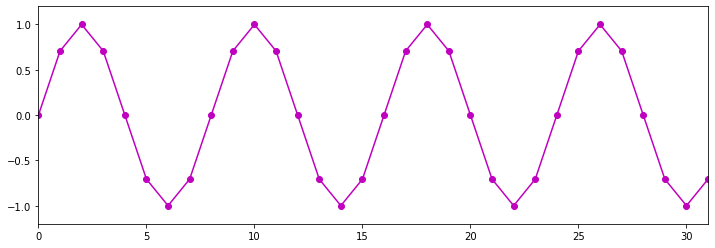

In [30]:
new_unshifted_sequence = s_matrix_inv.dot(new_shifted_sequence)

#Plot it
plt.figure(figsize=(12,4))
plt.plot(n_range, new_unshifted_sequence, 'mo-')
plt.xlim(0,len(n_range)-1)
plt.ylim(-1.2, 1.2)
warnings.filterwarnings("ignore")

Here's another example of inverting a linear transform.  In this example, we split a signal into two bands, a high frequency (or "highpass") band and a low frequency (or "lowpass") band.  Each band has the same number of samples as the original sequence, so the entire transform has twice as many samples as the original.  The lowpass and highpass filters are carefully chosen so that summing the low and high bands reconstructs the original signal.

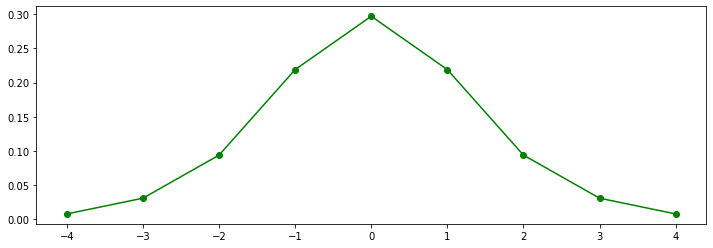

In [31]:
lo_filter = np.full((1,9), [.008, .031, .094, .219, .297, .219, .094, .031, .008])

#Plot it
plt.figure(figsize=(12,4))
plt.plot(np.arange(-4,5), np.squeeze(lo_filter), 'go-')

warnings.filterwarnings("ignore")

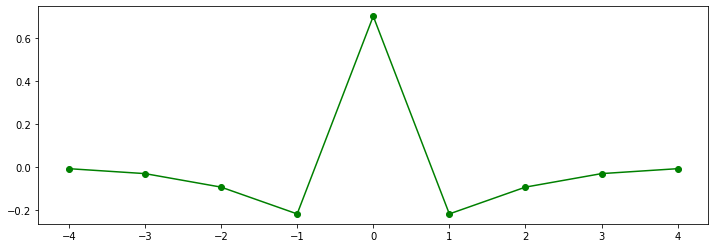

In [32]:
hi_filter = np.full((1,9), [-.008, -.031, -.094, -.219, .703, -.219, -.094, -.031, -.008])
#Plot it
plt.figure(figsize=(12,4))
plt.plot(np.arange(-4,5), np.squeeze(hi_filter), 'go-')
warnings.filterwarnings("ignore")

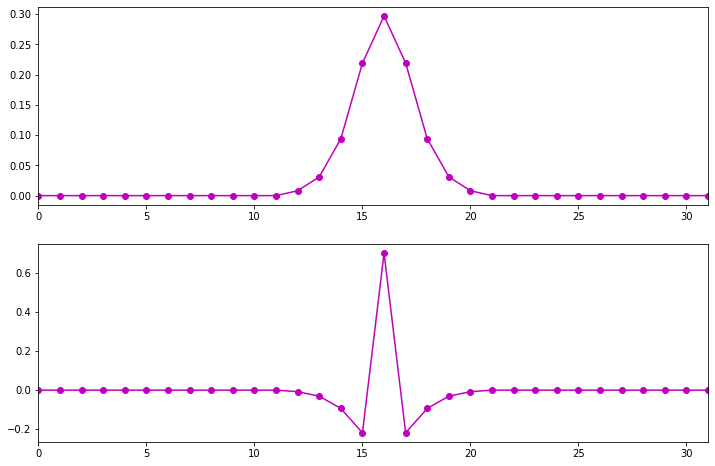

In [33]:
lo_impulse_response = cconv2(impulse,lo_filter)
hi_impulse_response = cconv2(impulse,hi_filter)

#Plot it
fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1, figsize=[12,8])
ax1.plot(n_range, np.squeeze(lo_impulse_response), 'mo-')
ax1.set_xlim(0,len(n_range)-1)
ax2.plot(n_range, np.squeeze(hi_impulse_response), 'mo-')
ax2.set_xlim(0,len(n_range)-1)
plt.show()


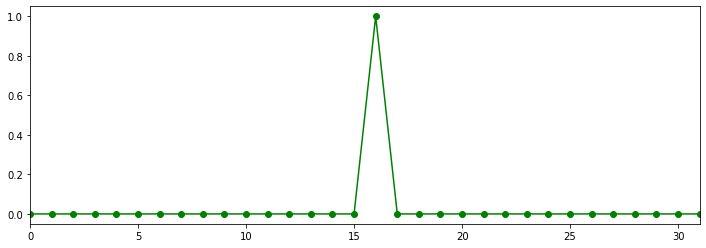

In [34]:
reconstruct_impulse = lo_impulse_response + hi_impulse_response

#Plot it
plt.figure(figsize=(12,4))
plt.plot(np.squeeze(reconstruct_impulse), 'go-')
plt.xlim(0,len(n_range)-1)
warnings.filterwarnings("ignore")

Should be zero:

In [35]:
np.mean((reconstruct_impulse-impulse)**2)

0.0

Let's compute the filter responses to a sinusoid:

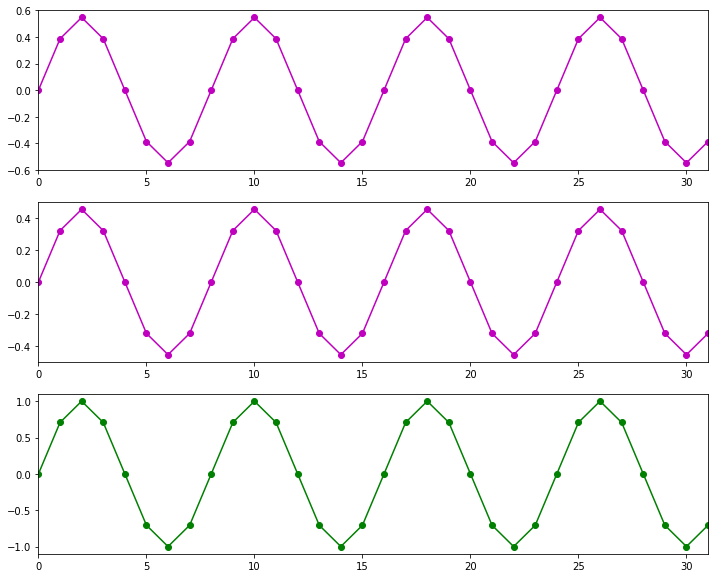

In [36]:
lo_sin_response = cconv2(sinusoid,lo_filter)
hi_sin_response = cconv2(sinusoid,hi_filter)
reconstruct_sin = lo_sin_response + hi_sin_response

#Plot it
fig, [ax1, ax2, ax3] = plt.subplots(nrows=3, ncols=1, figsize=[12,10])
ax1.plot(n_range, np.squeeze(lo_sin_response), 'mo-')
ax1.set_xlim(0,len(n_range)-1)
ax2.plot(n_range, np.squeeze(hi_sin_response), 'mo-')
ax2.set_xlim(0,len(n_range)-1)
ax3.plot(n_range, np.squeeze(reconstruct_sin), 'go-')
ax3.set_xlim(0,len(n_range)-1)
plt.show()

Should be zero:

In [37]:
np.mean((reconstruct_sin-sinusoid)**2)

4.366466548356777e-33

Now, let's see what the matrix looks like for this transform:

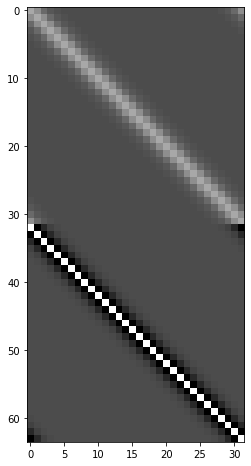

In [38]:
lh_matrix = np.zeros((64,32))
lo_row = [.008, .031, .094, .219, .297, .219, .094, .031, .008]
hi_row = [-.008, -.031, -.094, -.219, .703, -.219, -.094, -.031, -.008]

for row in range (0,32):
    k = 0
    for col in range (row-3, row+6):
        lh_matrix[row, np.remainder((col-1+32),32)] = lo_row[k]
        lh_matrix[row+32, np.remainder((col-1+32),32)] = hi_row[k]
        k = k + 1

#Plot it
plt.figure(figsize=(4,8))
plt.imshow(lh_matrix, cmap='Greys_r')
plt.show()

The top half of the rectangular matrix represents the shifted filter coefficients for the low-pass filter.  The bottom half represents those of the hi-pass filter.<br>

To invert the transform, we can use the pseudo-inverse,
$$
(M_{t} M)^{-1} M_{t}
$$
where M is the matrix, $M_{t}$ is the matrix transpose, and the -1 indicates matrix inverse.<br>

In Python, we can use numpy's `linalg.pinv` to compute the pseudo-inverse of a matrix:

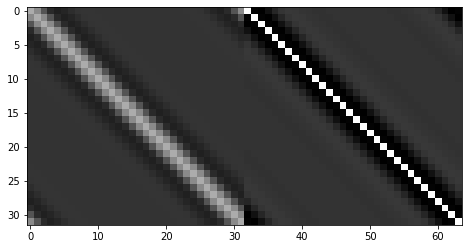

In [39]:
lh_matrix_inv = np.linalg.pinv(lh_matrix)

#Plot it
plt.figure(figsize=(8,4))
plt.imshow(lh_matrix_inv, cmap='Greys_r')
plt.show()

Let's check that this really is the inverse (multiplying them should give us the identity matrix): 

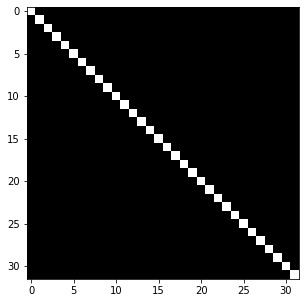

In [40]:
#Plot it
plt.figure(figsize=(5,5))
plt.imshow(lh_matrix_inv.dot(lh_matrix), cmap='Greys_r')
plt.show()

Now, recompute the transform (the lo-pass and hi-pass transform coefficients are displayed in one double-length sequence, next to each other):


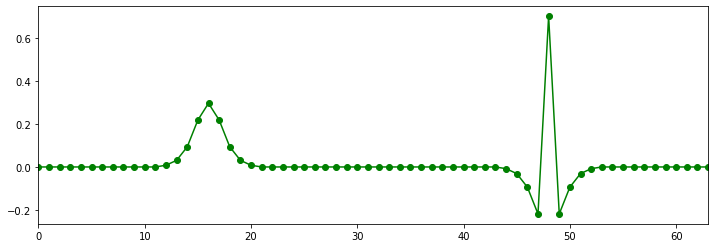

In [41]:
impulse_transform = lh_matrix.dot(np.transpose(impulse))

#Plot it
plt.figure(figsize=(12,4))
plt.plot(np.squeeze(impulse_transform), 'go-')
plt.xlim(0,63)
warnings.filterwarnings("ignore")

Invert the thransform:

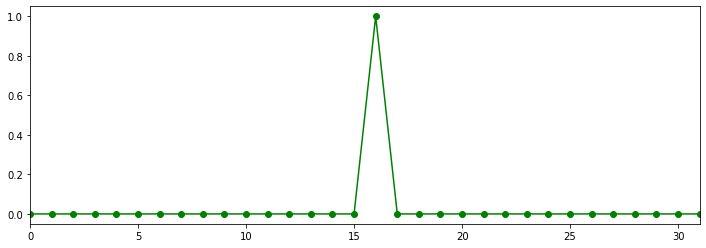

In [42]:
new_reconstruct_impulse = lh_matrix_inv.dot(impulse_transform)

#Plot it
plt.figure(figsize=(12,4))
plt.plot(np.squeeze(new_reconstruct_impulse), 'go-')
plt.xlim(0,len(n_range)-1)
warnings.filterwarnings("ignore")

Should be zero:

In [43]:
np.mean((impulse-np.transpose(new_reconstruct_impulse))**2)

8.691978510313269e-32

The inverse that we just used is different from just adding together the coefficients of the two bands (used above). There is more than one way to invert an overcomplete transform. <br> Let's construct the matrix that corresponds to adding the coefficients from the two bands, and make sure that it also inverts the transform:

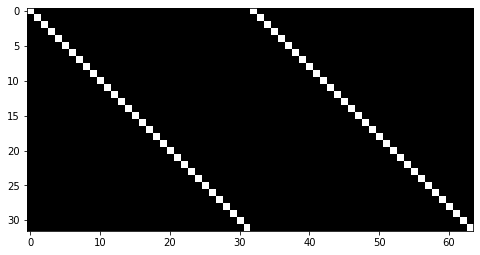

In [44]:
new_lh_matrix_inv = np.concatenate((np.eye(32), np.eye(32)), axis=1)
#Plot it
plt.figure(figsize=(8,8))
plt.imshow(new_lh_matrix_inv, cmap='Greys_r')
plt.show()

Check that this is also an inverse:

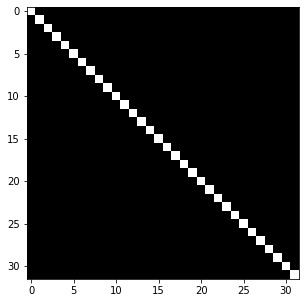

In [45]:
#Plot it
plt.figure(figsize=(5,5))
plt.imshow(new_lh_matrix_inv.dot(lh_matrix), cmap='Greys_r')
plt.show()

### 5. Sinusoidal sequences

Sinusoidal and cosinusoidal sequences play a particularly important role in representing signals, because complex exponential sequences (including sines and cosines) are the eigenfunctions of finite-dimensional linear time-invariant systems.  For example, a sinusoidal sequence convolved with a linear filter gives another sinusoidal sequence of the same frequency.  Only the phase and amplitude of the output sinusoid will be different.

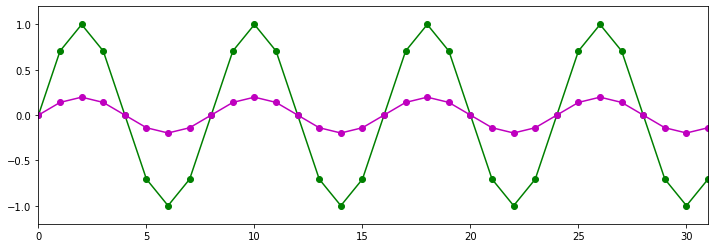

In [46]:
#Plot it
plt.figure(figsize=(12,4))
plt.plot(n_range, np.squeeze(sinusoid), 'go-')
plt.xlim(0,len(n_range)-1)
plt.ylim(-1.2, 1.2)

#Filter response to a sinusoid:
filter_params = np.full((1,9),[-.004, -.031, -.047, .031, .102, .031, -.047, -.031, -.004])
result = cconv2(sinusoid, filter_params)

#Plot it in the same plot
plt.plot(n_range, np.squeeze(result), 'mo-')
plt.show()

That filter changes only the amplitude, not the phase. Here's one that also changes the phase (via shift/delay):

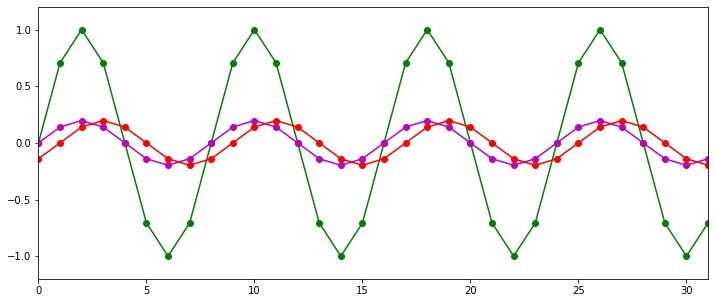

In [47]:
shift_filter = np.full((1,11), [0, 0, -.004, -.031, -.047, .031, .102, .031, -.047, -.031, -.004])
result_shift = cconv2(sinusoid,shift_filter)

#Plot all three
plt.figure(figsize=(12,5))
plt.plot(n_range, np.squeeze(sinusoid), 'go-')
plt.plot(n_range, np.squeeze(result), 'mo-')
plt.plot(n_range, np.squeeze(result_shift), 'ro-')
plt.xlim(0,len(n_range)-1)
plt.ylim(-1.2, 1.2)
plt.show()

Notice that for discrete sinusoids, unlike continous sinusoids, adding $2\pi$ to the frequency gives the same sinusoids:

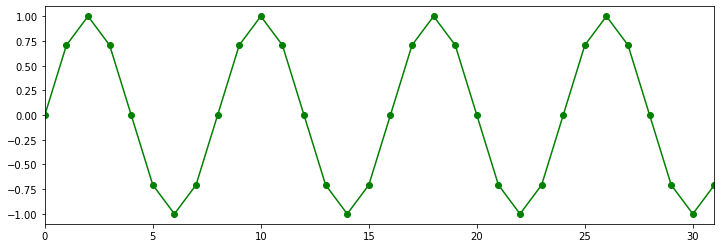

In [48]:
freq = 2*pi/period + 2*pi
sinusoid_shift_2pi = np.empty((1,len(n_range)))
sinusoid_shift_2pi[:] = amplitude * np.sin(freq_2 * n_range + phase_off)

#Plot it
plt.figure(figsize=(12,4))
plt.plot(n_range, np.squeeze(sinusoid_shift_2pi), 'go-')
plt.xlim(0,len(n_range)-1)
warnings.filterwarnings("ignore")

The importance of this is that we need only consider frequencies in a frequency interval of length $2\pi$ such as -$\pi$ to $\pi$. <br>

Let's try some really weird (in fact random) filters, just to demonstrate that no matter what you use, you still get a sinusoid of the same frequency:

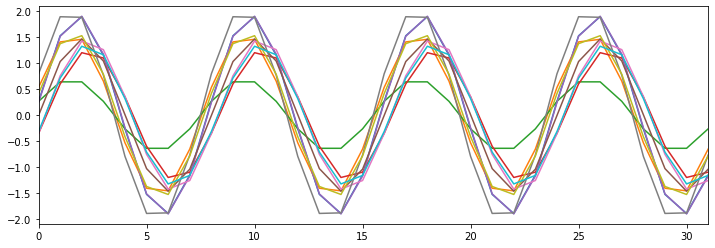

In [49]:
results = np.zeros((10,32))
plt.figure(figsize=(12,4))

for index in range(0,10):
    filter_params = np.full((1,5),np.random.uniform(0,1,5))
    results[index,:] = cconv2(sinusoid,filter_params)
    plt.plot(n_range, results[index,:] )
    plt.xlim(0,len(n_range)-1)

### 6. Fourier Series Representation

Any signal can be expressed as a (weighted) linear sum of impulses.  Likewise, a signal can be expressed as a (weighted) linear sum of sines and cosines.  As an example, let's make a gaussian as a sum of cosines:

`Gaussian`:

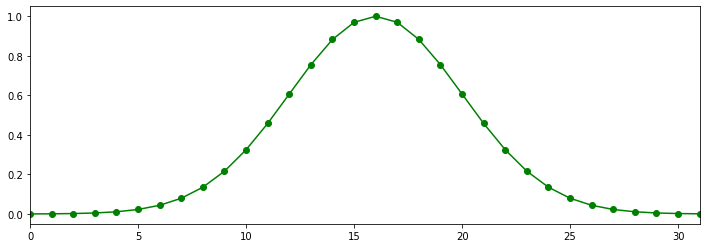

In [50]:
gaussian = np.exp(-((n_range-16)**2)/(2*4**2)) 

#Plot it
plt.figure(figsize=(12,4))
plt.plot(n_range, gaussian, 'go-')
plt.xlim(0,len(n_range)-1)
warnings.filterwarnings("ignore")

Fourier series approximation of Gaussian:

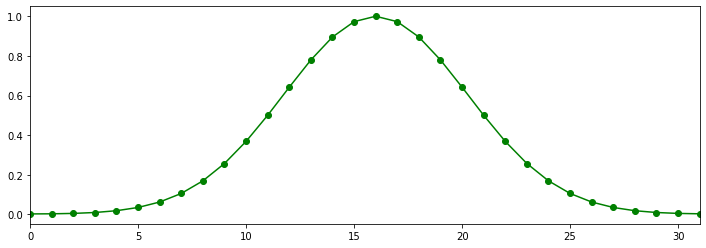

In [51]:
gaussian_series = (0.333 * np.ones((1,32)) + 
                   0.470 * np.cos(2*pi*1/32*(n_range-16)) + 
                   0.166 * np.cos(2*pi*2/32*(n_range-16)) + 
                   0.029 * np.cos(2*pi*3/32*(n_range-16)) + 
                   0.0025 * np.cos(2*pi*4/32*(n_range-16)))

#Plot it
plt.figure(figsize=(12,4))
plt.plot(n_range, np.squeeze(gaussian_series), 'go-')
plt.xlim(0,len(n_range)-1)
warnings.filterwarnings("ignore")

Should be small:

In [52]:
np. mean((gaussian - gaussian_series)**2)

0.0006221046279452332

<mark>The weights in the summation (.470, .166, 029, and .0025) are called the Fourier coefficients.</mark>

### 7. Fourier Transform

The Fourier transform is a particular linear transform that is used to compute the Fourier coefficients of a signal.  The transform matrix looks like this:

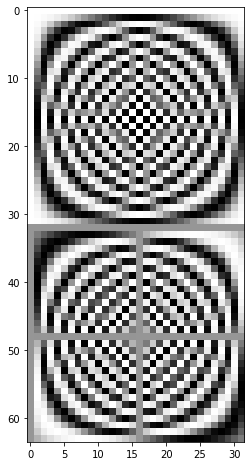

In [53]:
fourier_mat = np.zeros((64,32))
       
for k in range(0,32):
    fourier_mat[k,:] = np.cos(2*pi*k/32*n_range)/np.sqrt(32)
    fourier_mat[k+32,:] = np.sin(-2*pi*k/32*n_range)/np.sqrt(32)
               
#Plot it
plt.figure(figsize=(4,8))
plt.imshow(fourier_mat, cmap='Greys_r')
plt.show()

Each row is a sine or cosine.  Rows 2 and 6, for example:

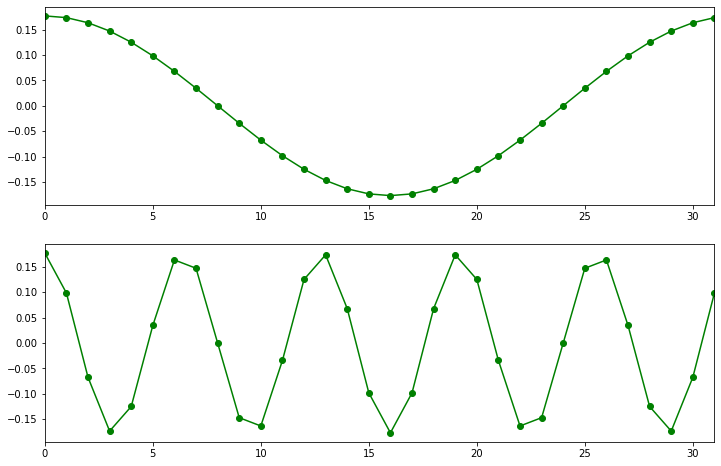

In [54]:
#Plot it
fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1, figsize=[12,8])
ax1.plot(n_range, fourier_mat[1], 'go-')
ax1.set_xlim(0,len(n_range)-1)
ax2.plot(n_range, fourier_mat[5], 'go-')
ax2.set_xlim(0,len(n_range)-1)
plt.show()


The top half of the matrix contains cosines of various frequencies, and the bottom half contains sines of various frequencies.  The very top row is a constant that pulls out the average (dc) component of a signal.  The transform is self-inverting, that is, multiplying the matrix by its transpose gives the identity transform.

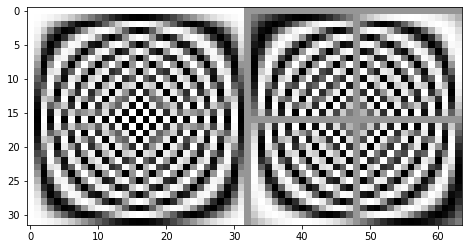

In [55]:
fourier_inv_mat = np.transpose(fourier_mat)

#Plot it
plt.figure(figsize=(8,4))
plt.imshow(fourier_inv_mat, cmap='Greys_r')
plt.show()

And now plot their product:

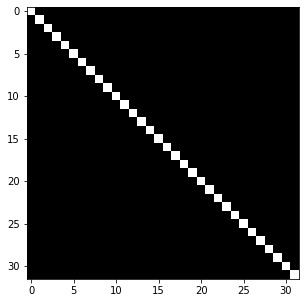

In [56]:
#Plot it
plt.figure(figsize=(5,5))
plt.imshow(fourier_inv_mat.dot(fourier_mat), cmap='Greys_r')
plt.show()

Let's look at the rows of the inverse (transpose) matrix.  The first half of each row is a cosine, and the second half of each row is a sine.  These sines and cosines are the same as the rows of the the Fourier matrix.

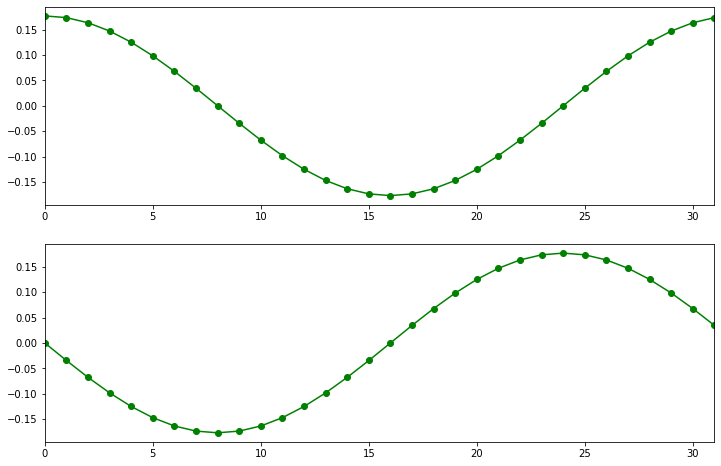

In [57]:
#Plot it
fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1, figsize=[12,8])
ax1.plot(n_range, fourier_inv_mat[1, 0:32], 'go-')
ax1.set_xlim(0,len(n_range)-1)
ax2.plot(n_range, fourier_inv_mat[1, 32:64 ], 'go-')
ax2.set_xlim(0,len(n_range)-1)
plt.show()


Let's take the Fourier transform of a cosinusoid:

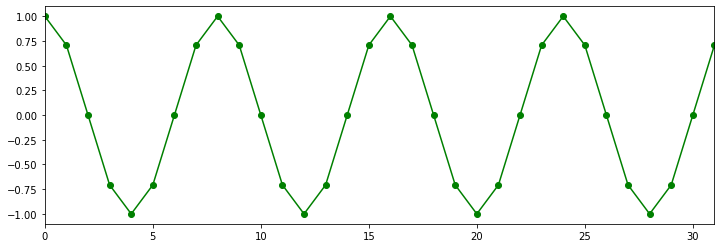

In [58]:
num_cycles = 4
cosinusoid = np.cos(2*pi*num_cycles/32*n_range)

#Plot it
plt.figure(figsize=(12,4))
plt.plot(cosinusoid, 'go-')
plt.xlim(0,len(n_range)-1)
warnings.filterwarnings("ignore")

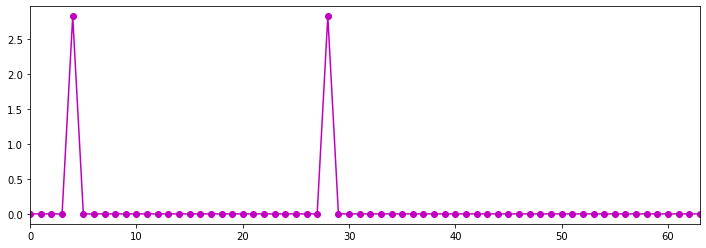

In [59]:
ft_cosinusoid = fourier_mat.dot(np.transpose(cosinusoid))

#Plot it
plt.figure(figsize=(12,4))
plt.plot(ft_cosinusoid, 'mo-')
plt.xlim(0,2*len(n_range)-1)
warnings.filterwarnings("ignore")

Notice the different x-axis in the plots above. 

We get a pair of impulses in the transform.  One of the impulses corresponds to the frequency of the signal (4 cycles per image) at position 4 in the transform.  Why is there a second impulse?  The Fourier transform is really set up to analyze complex signals.  For real signals, the transform has certain symmetry properties.  We will go into those in more detail below.

Let's try with a different frequency:

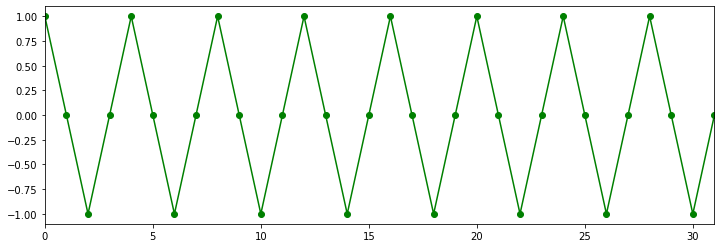

In [60]:
num_cycles = 8
cos_8 = np.cos(2*pi*num_cycles/32*n_range)

#Plot it
plt.figure(figsize=(12,4))
plt.plot(cos_8, 'go-')
plt.xlim(0,len(n_range)-1)
warnings.filterwarnings("ignore")

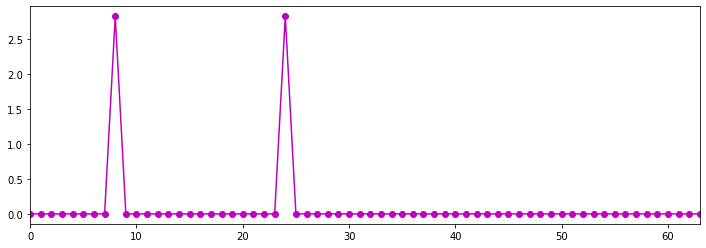

In [61]:
ft_cos_8 = fourier_mat.dot(np.transpose(cos_8))

#Plot it
plt.figure(figsize=(12,4))
plt.plot(ft_cos_8, 'mo-')
plt.xlim(0,2*len(n_range)-1)
warnings.filterwarnings("ignore")

Again, the location of the impulses in the transform corresponds to the frequency of the signal.  For example, a frequency of 8 cycles per image gives an impulse at positions 8 and 32-8=24 in the transform domain.

For a sinusoid, we get impulses in the second half (positions > 32) of the output because the sinusoids are in the bottom half of the system matrix.

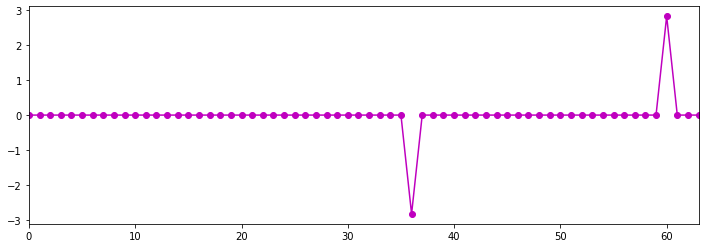

In [62]:
transform = fourier_mat.dot(np.transpose(sinusoid))

#Plot it
plt.figure(figsize=(12,4))
plt.plot(transform, 'mo-')
plt.xlim(0,2*len(n_range)-1)
warnings.filterwarnings("ignore")

The Fourier transform is inverted by using the transpose of the system matrix:

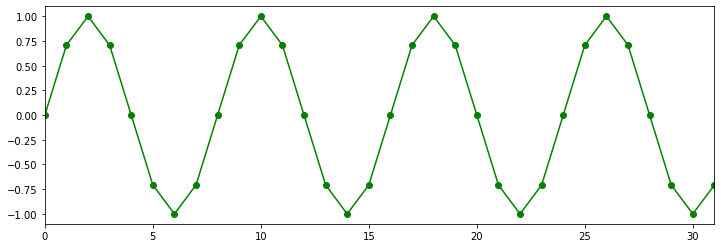

In [63]:
invert_transform = np.transpose(fourier_mat).dot(transform)

#Plot it
plt.figure(figsize=(12,4))
plt.plot(invert_transform, 'go-')
plt.xlim(0,len(n_range)-1)
warnings.filterwarnings("ignore")

Should be zero:

In [64]:
np.mean((np.transpose(invert_transform) - sinusoid)**2)

7.374578875175879e-30

<mark>The FFT algorithm is an efficient way of computing the Fourier transform, without bothering with the matrix multiplication. </mark>

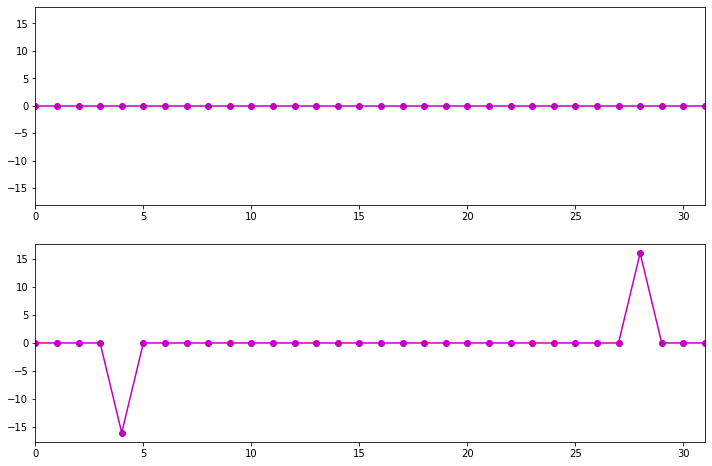

In [65]:
ft_sinusoid = np.fft.fft(sinusoid)

# Cosinusoidal (real) part:
real_part = np.real(ft_sinusoid)

#Sinusoidal (imaginary) part
imag_part = np.imag(ft_sinusoid)

#Plot it
fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1, figsize=[12,8])
ax1.plot(n_range, np.squeeze(real_part), 'mo-')
ax1.set_xlim(0,len(n_range)-1)
ax1.set_ylim(-18,18)
ax2.plot(n_range, np.squeeze(imag_part), 'mo-')
ax2.set_xlim(0,len(n_range)-1)
plt.show()

FFT returns complex numbers. The imaginary part contains the sine components and the real part contains the cosine components.  The first sample corresponds to the "DC" or constant coefficient.

Often, people represent Fourier coefficients in terms of magnitude and phase, rather than real and imaginary:

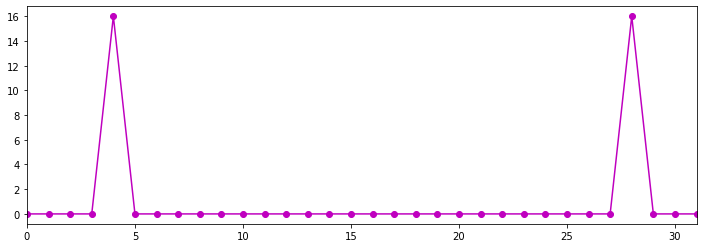

In [66]:
mag_sin = np.abs(ft_sinusoid)

#Plot it
plt.figure(figsize=(12,4))
plt.plot(np.transpose(mag_sin), 'mo-')
plt.xlim(0,len(n_range)-1)
warnings.filterwarnings("ignore")

Here's a whole series of Fourier transforms for different frequency sinusoids. Drag with the slider to see the different imaginary parts of the Fourier transforms:

In [284]:
@widgets.interact(freq=widgets.IntSlider(min=0, max=31, step=1, value=0))
def plot_imag_fft(freq):
    fig, ax = plt.subplots(1, 1, figsize=[12,5])
    sin_freq = np.sin(2*pi*freq/32*n_range)
    imag_ft_sin_freq = np.imag(np.fft.fft(sin_freq))
    ax.plot(imag_ft_sin_freq, 'mo-')
    ax.set_xlim(0,len(n_range)-1)
    ax.set_ylim(-18,18)
    fig.subplots_adjust(wspace=0, hspace=0)
    plt.show()

interactive(children=(IntSlider(value=0, description='freq', max=31), Output()), _dom_classes=('widget-interac…

Now, let's compute Fourier transforms of some other signals:

##### Fourier transform of a constant function:

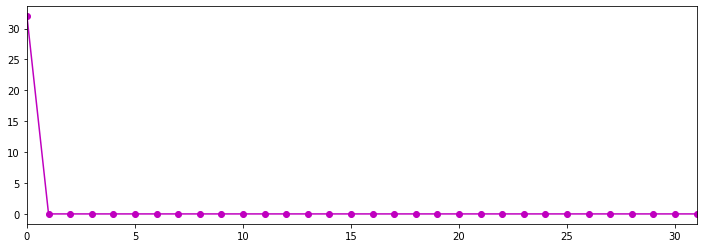

In [68]:
constant = np.ones((1,32))
mag_constant = np.abs(np.fft.fft(constant))

#Plot it
plt.figure(figsize=(12,4))
plt.plot(np.transpose(mag_constant), 'mo-')
plt.xlim(0,len(n_range)-1)
warnings.filterwarnings("ignore")

Numpy's `fft.fftshift` puts shifts the frequency axis to put the DC component in the middle:

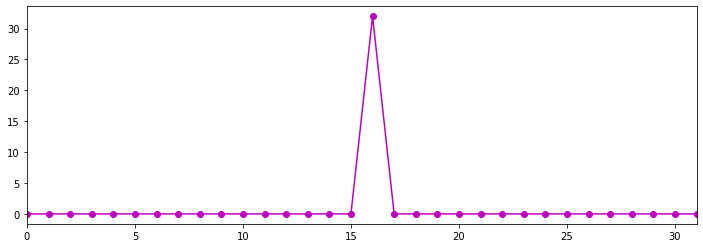

In [69]:
mag_constant = np.abs(np.fft.fftshift(np.fft.fft(constant)))

#Plot it
plt.figure(figsize=(12,4))
plt.plot(np.transpose(mag_constant), 'mo-')
plt.xlim(0,len(n_range)-1)
warnings.filterwarnings("ignore")

##### Fourier transform of a Gaussian function:
the imaginary part is zero and the real part is itself a Gaussian.

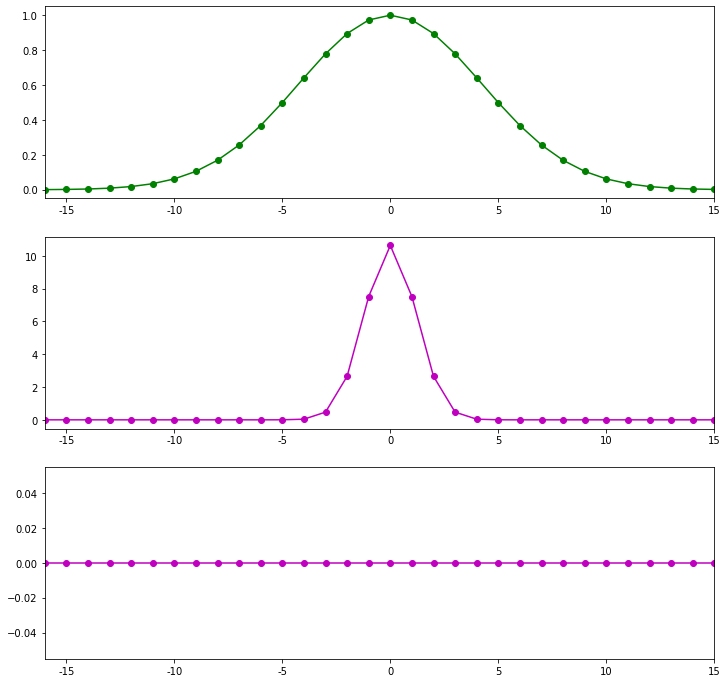

In [170]:
gaussian = np.exp(-((n_range-16)/6)**2) 

ft_gaussian = np.fft.fftshift(np.fft.fft(np.fft.fftshift(gaussian)))
real_ft_gaussian = np.real(ft_gaussian)
imag_ft_gaussian = np.imag(ft_gaussian)

#Plot it
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=[12,12])
axes[0].plot(gaussian, 'go-')
axes[1].plot(real_ft_gaussian, 'mo-')
axes[2].plot(imag_ft_gaussian, 'mo-')

plt.setp(axes, xticks=[1, 6, 11, 16, 21, 26, 31], xticklabels=[-15, -10, -5, 0, 5, 10, 15])
plt.setp(axes, xlim=(0,len(n_range)-1))
plt.show()

<mark>Making the Gaussian smaller in one domain makes it larger in the other domain:</mark>

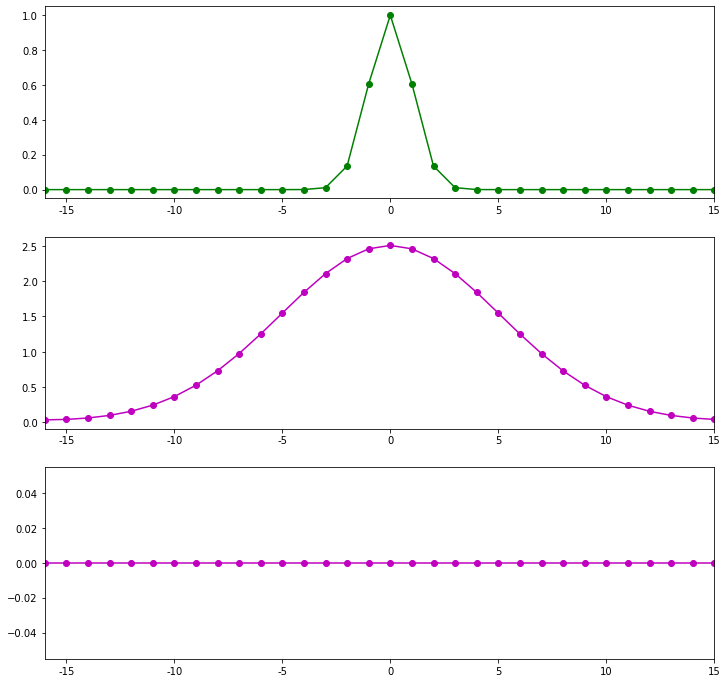

In [171]:
little_gauss = np.exp(-(((n_range-16))**2)/2) 

ft_little_gauss = np.fft.fftshift(np.fft.fft(np.fft.fftshift(little_gauss)))
real_ft_little_gauss = np.real(ft_little_gauss)
imag_ft_little_gauss = np.imag(ft_little_gauss)

#Plot it
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=[12,12])
axes[0].plot(little_gauss, 'go-')
axes[1].plot(real_ft_little_gauss, 'mo-')
axes[2].plot(imag_ft_little_gauss, 'mo-')

plt.setp(axes, xticks=[1, 6, 11, 16, 21, 26, 31], xticklabels=[-15, -10, -5, 0, 5, 10, 15])
plt.setp(axes, xlim=(0,len(n_range)-1))
plt.show()

This is an example of what is known as the uncertainty principle. When a signal is more localized in one domain, it is less well localized in the other domain.

### 8. Symmetry properties of Fourier Transform

<mark>For any real-valued, antisymmetric (odd) function, in which f(x) = -f(-x), the real part of the FT is zero, and the imaginary part of the FT is antisymmetric (odd).  For any real-valued, symmetric (even) function, in which f(x) = f(-x), the imaginary part of the FT is zero and the real part is symmetric (even).</mark>

In [183]:
random_signal = 0.5-np.random.rand(1,64)

Decompose random_signal into even and odd components:

`even_signal[x] = 0.5(random_signal[x]+random_signal[-x])`<br>
`odd_signal[x]  = 0.5(random_signal[x]-random_signal[-x])`

One can easily verify that

`random_signal[x] = even_signal[x]+odd_signal[x]`

Note that the origin (i.e. x=0) is at location 32 (i.e. random_signal[32]).

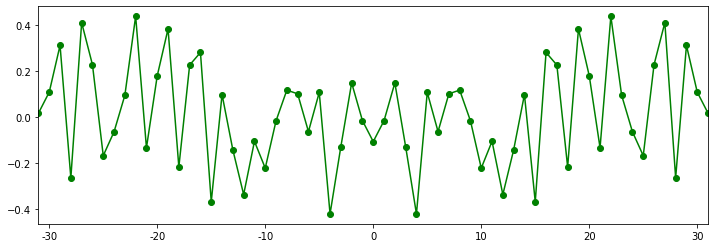

In [184]:
even_signal = np.zeros((1,64))
even_signal[0] = random_signal[0]
for index in range (-31,32):
    even_signal[:,index+32] = 0.5*(random_signal[:,index+32]+random_signal[:,-index+32])

#Plot it
plt.figure(figsize=(12,4))
plt.plot(np.transpose(even_signal), 'go-')
xticks=[2, 12, 22, 32, 42, 52, 62]
xlabels = [-30, -20, -10, 0, 10, 20, 30]
plt.xticks(ticks = xticks, labels = xlabels)
plt.xlim(1,63)
plt.show()
warnings.filterwarnings("ignore")

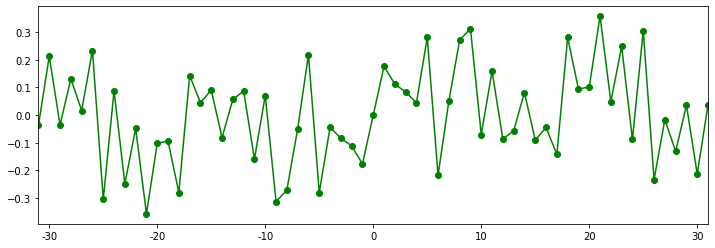

In [185]:
odd_signal = np.zeros((1,64))
odd_signal[0] = random_signal[0]
for index in range (-31,32):
    odd_signal[:,index+32] = 0.5*(random_signal[:,index+32]-random_signal[:,-index+32])

#Plot it
plt.figure(figsize=(12,4))
plt.plot(np.transpose(odd_signal), 'go-')
xticks=[2, 12, 22, 32, 42, 52, 62]
xlabels = [-30, -20, -10, 0, 10, 20, 30]
plt.xticks(ticks = xticks, labels = xlabels)
plt.xlim(1,63)
plt.show()
warnings.filterwarnings("ignore")

<mark>Real part of Fourier transform of an even signal is even-symmetric; imaginary part is zero.</mark>

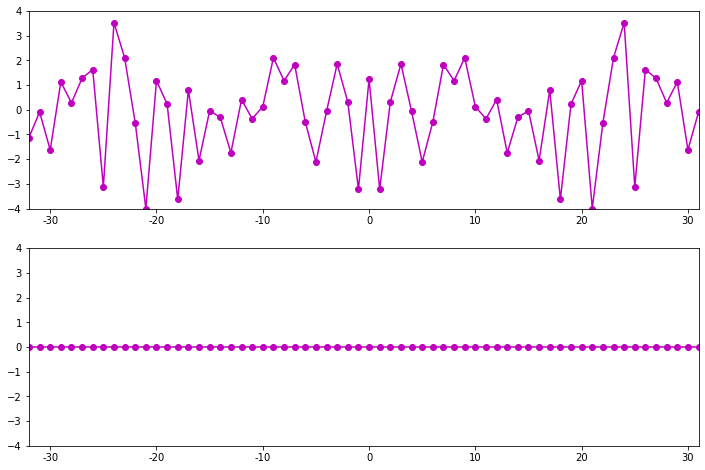

In [186]:
ft_even_signal = np.fft.fftshift(np.fft.fft(np.fft.fftshift(even_signal)))
real_ft_even = np.real(ft_even_signal)
imag_ft_even = np.imag(ft_even_signal)

#Plot it
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=[12,8])
axes[0].plot(np.transpose(real_ft_even), 'mo-')
axes[1].plot(np.transpose(imag_ft_even), 'mo-')

plt.setp(axes, xticks=[2, 12, 22, 32, 42, 52, 62], xticklabels=[-30, -20, -10, 0, 10, 20, 30])
plt.setp(axes, xlim=(0,63), ylim=(-4,4) )
plt.show()

<mark>Imaginary part of Fourier transform of an odd signal is odd-symmetric; real part is zero.</mark><br>
*** busted (real part isn't quite zero)


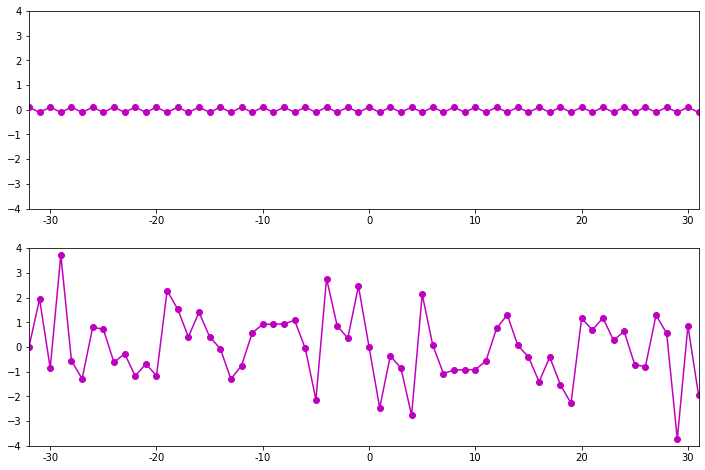

In [187]:
ft_odd_signal = np.fft.fftshift(np.fft.fft(np.fft.fftshift(odd_signal)))
real_ft_odd = np.real(ft_odd_signal)
imag_ft_odd = np.imag(ft_odd_signal)

#Plot it
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=[12,8])
axes[0].plot(np.transpose(real_ft_odd), 'mo-')
axes[1].plot(np.transpose(imag_ft_odd), 'mo-')

plt.setp(axes, xticks=[2, 12, 22, 32, 42, 52, 62], xticklabels=[-30, -20, -10, 0, 10, 20, 30])
plt.setp(axes, xlim=(0,63), ylim = (-4,4))
plt.show()

<mark>For any real-valued signal, the real part of the FT is even-symmetric and the imaginary part of the FT is odd-symmetric.</mark>


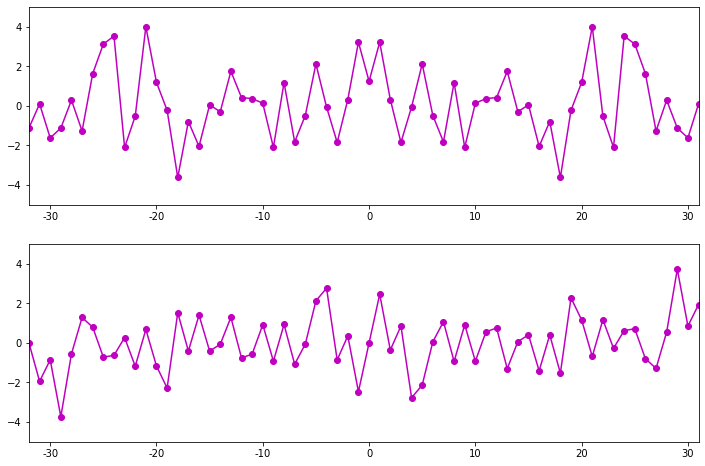

In [190]:
ft_random_signal = np.fft.fftshift(np.fft.fft(random_signal))
real_ft_random = np.real(ft_random_signal)
imag_ft_random = np.imag(ft_random_signal)

#Plot it
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=[12,8])
axes[0].plot(np.transpose(real_ft_random), 'mo-')
axes[1].plot(np.transpose(imag_ft_random), 'mo-')

plt.setp(axes, xticks=[2, 12, 22, 32, 42, 52, 62], xticklabels=[-30, -20, -10, 0, 10, 20, 30])
plt.setp(axes, xlim=(0,63), ylim=(-5,5) )
plt.show()

Taken together, these symmetry properties mean that there is quite a lot of redundancy in the FT of a real signal.  A simple way to count the amount of redundancy is to compare the number of samples.  Take a real-valued input signal with 64 samples. Computing its fft gives a total of 128 samples (half in the real part and half in the imaginary part), a factor of 2 redundant.

### 9. Parseval's Theorem
<mark>The sum of squared values over space domain equals the sum of squared values over frequency domain.</mark><br>

These two should be the equal:

In [192]:
print(np.sum(np.sum(gaussian**2)))
print(np.sum(np.sum(np.abs(ft_gaussian)**2))/32)

7.519883910292837
7.519883910292838


Ignore the factor of 32 for now.  It is explained below.

### 10. Circular Shifting

<mark>If we shift the signal as if it were periodic (i.e., translate the signal, wrapping around at the edges), this does not affect the Fourier transform magnitude.</mark><br>

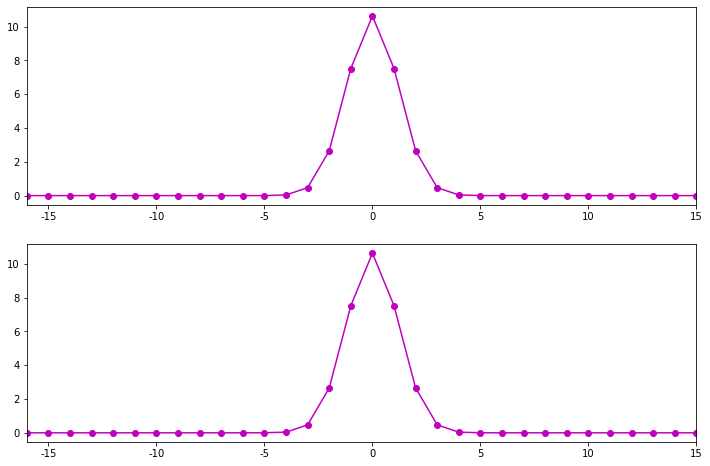

In [201]:
fft_gauss = np.fft.fftshift(np.fft.fft(np.fft.ifftshift(gaussian)))
mag_fft_gauss = np.abs(fft_gauss)

fft_shift_gauss = np.fft.fftshift(np.fft.fft(np.fft.ifftshift(np.roll(gaussian,3))))
mag_fft_shift_gauss = np.abs(fft_shift_gauss)

#Plot it
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=[12,8])
axes[0].plot(np.transpose(mag_fft_gauss), 'mo-')
axes[1].plot(np.transpose(mag_fft_shift_gauss), 'mo-')

plt.setp(axes, xticks=[1, 6, 11, 16, 21, 26, 31], xticklabels=[-15, -10, -5, 0, 5, 10, 15])
plt.setp(axes, xlim=(0,len(n_range)-1))
plt.show()

Should be zero:

In [202]:
np.mean((mag_fft_shift_gauss - mag_fft_gauss)**2)

7.608062124775055e-32

### 11. Differentiation

<mark> Taking a derivative of a signal in time is the same as multiplying by an imaginary ramp in frequency.</mark>

In particular,<br> 
`Fourier{d/dx f(x)} = -i w Fourier{f(x)}`, <br>
where $i = sqrt(-1)$ and $w$ is normalized frequency.

For an intuition for the derivative property, recall that <br>
$d/dx[cos(wx)] = -w sin(wx)$.

For example, let's consider a Gaussian and the first derivative of a Gaussian.

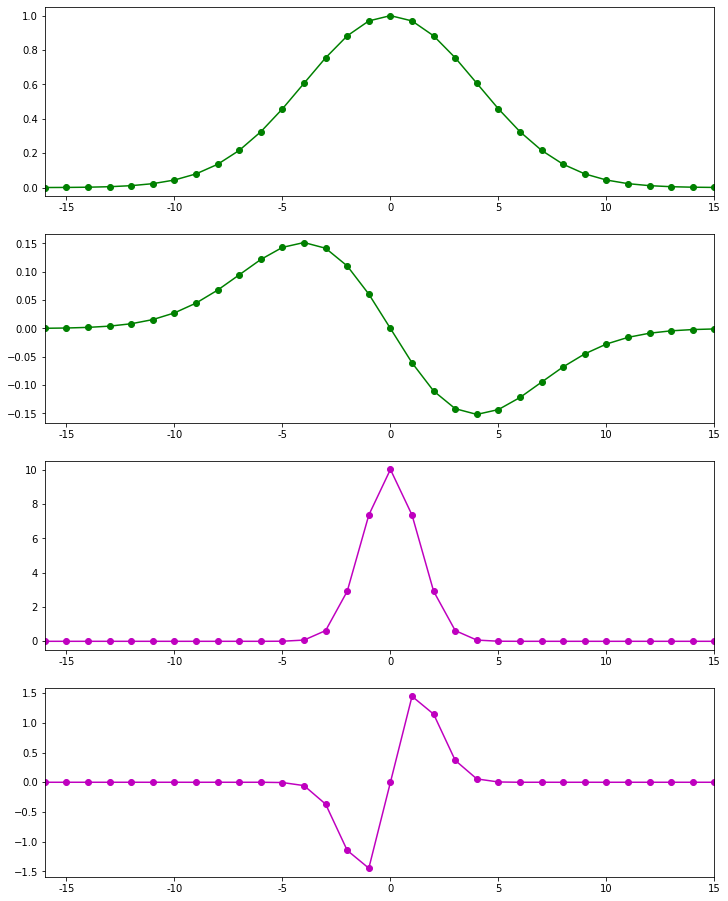

In [206]:
gaussian = np.exp(-((n_range-16)**2)/(2*4**2)) 
gaussian_deriv = -2/(2*4**2)*(n_range-16)*gaussian

ft_gaussian = np.fft.fftshift(np.fft.fft(np.fft.fftshift(gaussian)))
real_ft_gaussian = np.real(ft_gaussian)

ft_gaussian_deriv = np.fft.fftshift(np.fft.fft(np.fft.fftshift(gaussian_deriv)))
imag_ft_gaussian_deriv = np.imag(ft_gaussian_deriv)

#Plot it
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=[12,16])
axes[0].plot(gaussian, 'go-')
axes[1].plot(gaussian_deriv, 'go-')
axes[2].plot(real_ft_gaussian, 'mo-')
axes[3].plot(imag_ft_gaussian_deriv, 'mo-')

plt.setp(axes, xticks=[1, 6, 11, 16, 21, 26, 31], xticklabels=[-15, -10, -5, 0, 5, 10, 15])
plt.setp(axes, xlim=(0,len(n_range)-1))
plt.show()

Now compute the Fourier transform of the derivative of a gaussian by multiplying the Fourier transform of a gaussian by the ramp:

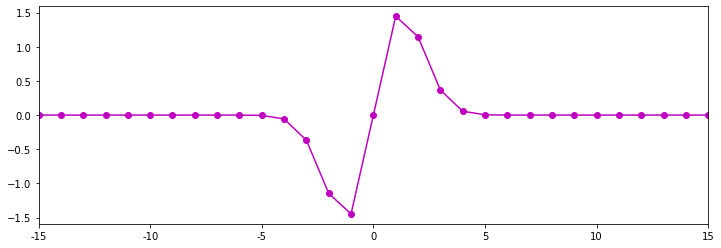

In [232]:
#ramp := i w :
ramp = 2*pi/32*np.sqrt(-1+0j)*(n_range-16)

ft_gaussian_mul_ramp = ramp * ft_gaussian
imag_ft_gaussian_mul_ramp = np.imag(ft_gaussian_mul_ramp)

#Plot it
plt.figure(figsize=(12,4))
plt.plot(imag_ft_gaussian_mul_ramp, 'mo-')
xticks=[1, 6, 11, 16, 21, 26, 31]
xlabels = [-15, -10, -5, 0, 5, 10, 15]
plt.xticks(ticks = xticks, labels = xlabels)
plt.xlim(1,31)
plt.show()
warnings.filterwarnings("ignore")

Should be zero:

In [212]:
np.mean((ft_gaussian_deriv - ft_gaussian_mul_ramp)**2)

(5.1968195214891873e-08-1.033925263847123e-08j)

### 12. Modulation

<mark>Multiplication in time domain is the same as convolution in the frequency domain, up to a known scale factor.</mark> For example, a Gabor function is a sinusoid multiplied by a Gaussian window. Thus, the FT of a Gabor is the convolution of the FT of a Gaussian with the FT of a sinusoid.  This is an easy way to gain an intuition for the filtering properties of a Gabor filter.

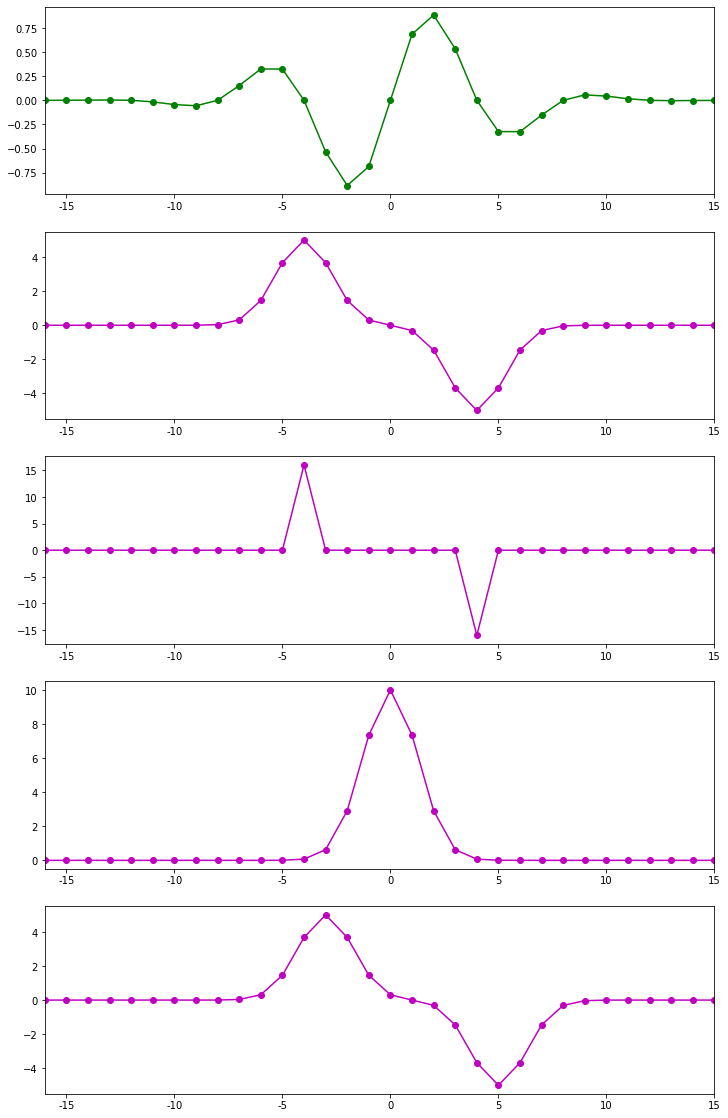

In [241]:
gabor = gaussian * sinusoid

ft_gabor = np.fft.fftshift(np.fft.fft(np.fft.ifftshift(gabor)))
imag_ft_gabor = np.imag(ft_gabor)

ft_sinusoid = np.fft.fftshift(np.fft.fft(np.fft.ifftshift(sinusoid)))
imag_ft_sinusoid = np.imag(ft_sinusoid)

ft_gaussian = np.fft.fftshift(np.fft.fft(np.fft.ifftshift(gaussian)))
real_ft_gaussian = np.real(ft_gaussian)

imag_conv_of_fts = cconv2(np.expand_dims(np.real(ft_gaussian),axis=0), np.imag(ft_sinusoid))/32
#above, we need to add an axis because cconv2 needs 2-dimensional vectors

#Plot it
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=[12,20])
axes[0].plot(np.transpose(gabor), 'go-')
axes[1].plot(np.transpose(imag_ft_gabor), 'mo-')
axes[2].plot(np.transpose(imag_ft_sinusoid), 'mo-')
axes[3].plot(real_ft_gaussian, 'mo-')
axes[4].plot(np.transpose(imag_conv_of_fts), 'mo-')

plt.setp(axes, xticks=[1, 6, 11, 16, 21, 26, 31], xticklabels=[-15, -10, -5, 0, 5, 10, 15])
plt.setp(axes, xlim=(0,len(n_range)-1))
plt.show()

Should be zero:

In [242]:
np.mean((imag_ft_gabor - imag_conv_of_fts)**2)

1.0147064926228666

### 13. Convolution Theorem

<mark>Convolution in the time domain is the same as multiplication in the frequency domain, up to a known scale factor.</mark>  This theorem is extremely useful.  Sometimes, you have a filter that is simple to characterize in the frequency domain, but complicated in the time domain. For example, it may be very compact in the frequency domain (i.e., zero nearly everywhere), but very big (i.e., lots of samples needed) in the time domain. In such cases, you can do the filtering by Fourier transforming the signal, multiplying in the frequency domain, and then Fourier transforming back.

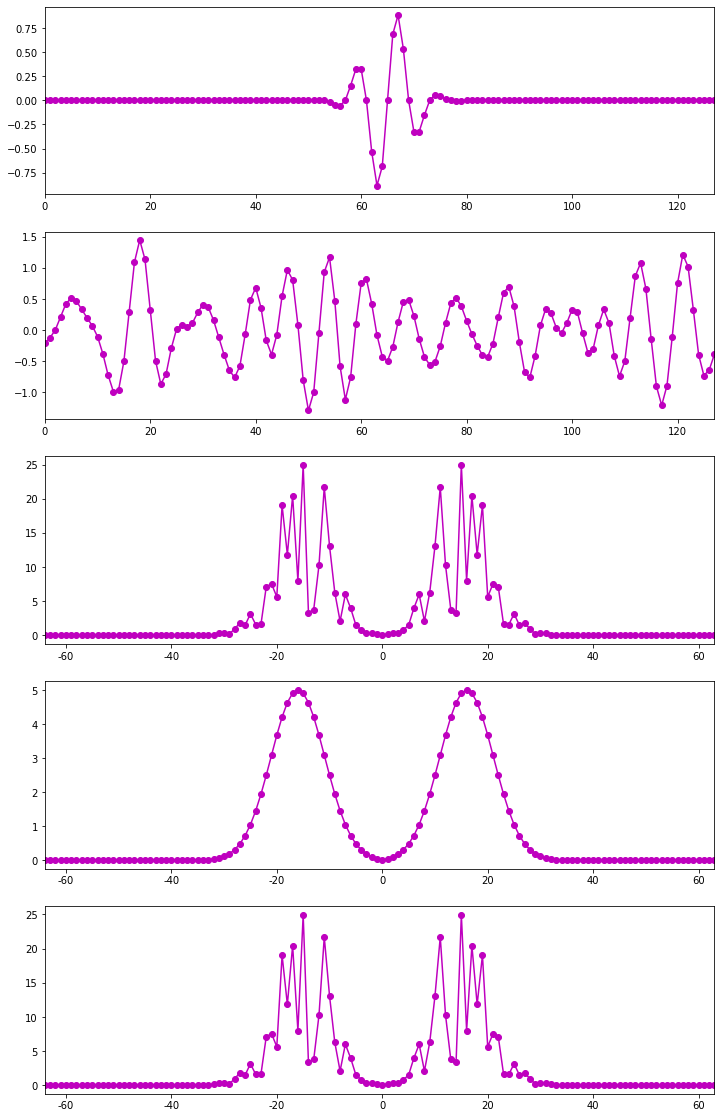

In [270]:
gabor_filter = gabor
impulse_signal = np.zeros((1,128))
impulse_signal[0,64] = 1
random_signal = 0.5-np.random.rand(1,128)

impulse_response = cconv2(impulse_signal,gabor_filter)

filtered_signal = cconv2(random_signal,gabor_filter)

ft_filtered_signal = np.fft.fftshift(np.fft.fft(np.fft.ifftshift(filtered_signal)))

frequency_response = np.fft.fftshift(np.fft.fft(np.fft.ifftshift(impulse_response)))

ft_random_signal = np.fft.fftshift(np.fft.fft(np.fft.ifftshift(random_signal)))
product_of_fts = frequency_response * ft_random_signal

#Plot it
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=[12,20])
xticks=(4,24,44,64,84,104,124)
xlabels = (-60,-40,-20,0,20,40,60)

axes[0].plot(np.transpose(impulse_response), 'mo-')
axes[1].plot(np.transpose(filtered_signal), 'mo-')
axes[2].plot(np.abs(np.transpose(ft_filtered_signal)), 'mo-')
axes[2].set_xticks(xticks)
axes[2].set_xticklabels(xlabels)
axes[3].plot(np.abs(np.transpose(frequency_response)), 'mo-')
axes[3].set_xticks(xticks)
axes[3].set_xticklabels(xlabels)
axes[4].plot(np.abs(np.transpose(product_of_fts)), 'mo-')
axes[4].set_xticks(xticks)
axes[4].set_xticklabels(xlabels)

plt.setp(axes, xlim=(0,127))
plt.show()


Should be zero:

In [262]:
np.mean((product_of_fts - ft_filtered_signal)**2)

(4.3434291106974765e-31+2.122213994921354e-31j)

### 14. Frequency Response

Since the Convolution Theorem is so useful, <mark>the Fourier transform of the impulse response of a time-invariant linear system</mark> has a special name. It <mark>is called the Frequency Response of the linear system.</mark>

Remember that for a sinusoidal input, the output of a time-invariant linear system is sinusoidal with the same frequency. Only the amplitude and phase will be changed by filtering.  The frequency response of a filter can be used to "read off" the amplitude attenuation and the phase shift, for each frequency.  For a complicated signal, that can be expressed as the sum of a number of sinusoids, the frequency response can be used to "read off" the attenuation and phase shift for each component.

As another example, let's compute the frequency response of the 1 sample delay system:

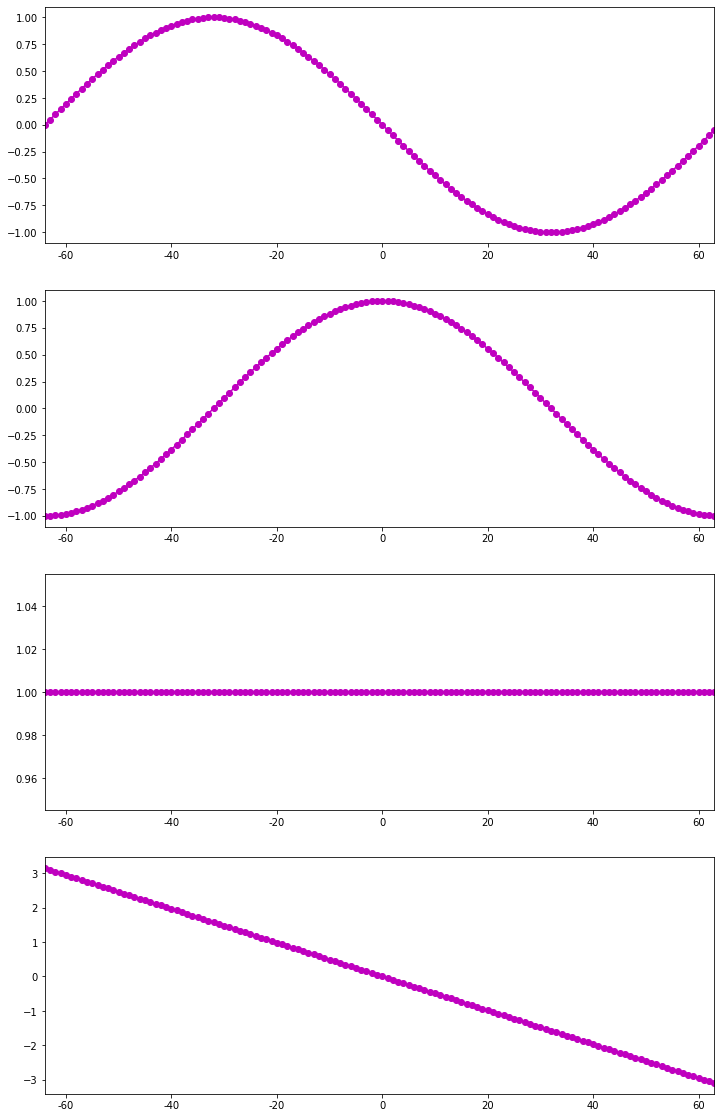

In [271]:
delay_filter = np.full((1,3),(0,0,1))
impulse_response = cconv2(impulse_signal, delay_filter)

frequency_response = np.fft.fftshift(np.fft.fft(np.fft.fftshift(impulse_response)))

#Plot it
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=[12,20])
axes[0].plot(np.transpose(np.imag(frequency_response)), 'mo-')
axes[1].plot(np.transpose(np.real(frequency_response)), 'mo-')
axes[2].plot(np.transpose(np.abs(frequency_response)), 'mo-')
axes[3].plot(np.transpose(np.angle(frequency_response)), 'mo-')

plt.setp(axes, xticks=[4,24,44,64,84,104,124], xticklabels=[-60,-40,-20,0,20,40,60])
plt.setp(axes, xlim=(0,127))
plt.show()

For the delay system, the magnitude of the frequency response is constant (1 for all frequencies), and the phase is $-w$.


You may have noticed in a few places, we multiplied by the square root of the number of samples (e.g., 32).  This scale factor is needed given the way that the fft is implemented in Python.  In some textbooks (e.g., Oppenheim and Schafer), the discrete Fourier transform (DFT) is defined so that you divide by the number of samples ($N$) when doing the inverse transform (from the frequency domain back into the space/time domain). In other texts, the DFT is defined so that you divided by $N$ when doing the forward transform.  In still other texts, you divide by $\sqrt{N}$ when doing both the forward and the inverse transforms, so that the Fourier transform is an orthonormal transform.  The implementation in Python follows the first (divide by $N$ in the inverse tranform) of these conventions.

If you lose track of which convention is being used, it is, unfortunately, easy to get confused.  For example, using the Python convention, we write Parseval's theorem as follows (with a factor of $1/N$):

$$
        \text{  sum  } |x[n]|^2 = \frac{1}{N} \text{  sum  } |X[w]|^2
$$

Using the orthonormal (divide by sqrt($N$) for the forward and inverse transforms) convention, Parseval's theorem has no scale factor:

$$
        \text{  sum  } |x[n]|^2 = \text{  sum  } |X[w]|^2
$$

Using the Matlab convention the convolution theorem has no scale factor:

$$
         F\{x1[n] * x2[n]\} = X1[k]\text{ } X2[k]
$$

Using the orthonormal convention, the convolution theorem has a factor of $\sqrt{N}$:

$$
         F\{x1[n] * x2[n]\} = \sqrt{N} \text{ } X1[k] \text{ } X2[k]
$$

### 15. Discrete Cosine Transform

The DCT is another linear transform that is closely related  to the DFT. The rows of the DCT transform matrix are cosines:

$$
       c(k)\text{ }\frac{1}{\sqrt{N}}\text{ }\cos\big(\frac{\pi k}{2N}\text{ }(2n+1)\big)
$$

where $c(k)=1$ for $k=0$ and $c(k)=\sqrt{2}$ otherwise.  Here, $k$ indexes the row and $n$ indexes the column. In other words, $n$ indexes the sample position of the original signal and $k$ indexes the transform coefficients.

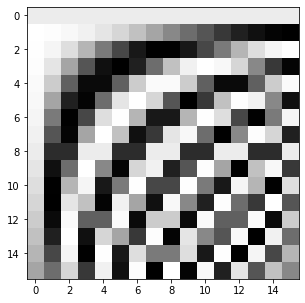

In [278]:
DCT_mat = np.zeros((16,16))
nn_range = np.arange(0,16)
for k in range (0,16):
    if (k==0):
        c=1
    else:
        c=np.sqrt(2) 
    DCT_mat[k,:] = c/np.sqrt(16)*np.cos(pi/(2*16)*k*(2*nn_range+1))

#Plot it
plt.figure(figsize=(5,5))
plt.imshow(DCT_mat, cmap='Greys_r')
plt.show()

The DCT matrix is square and orthonormal:

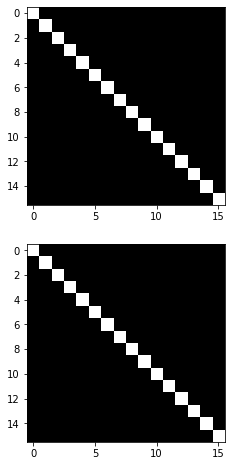

In [279]:
#Plot it
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=[12,8])
axes[0].imshow(DCT_mat.dot(np.transpose(DCT_mat)), cmap='Greys_r')
axes[1].imshow(np.transpose(DCT_mat).dot((DCT_mat)), cmap='Greys_r')
plt.show()